<a href="https://colab.research.google.com/github/duskovesic/Machine-Learning/blob/main/07_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Uvod

U ovoj svesci kreiran je DCGAN

#Importovanje i setapovanje

In [98]:
import numpy as np

from matplotlib import pyplot as plt

from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Reshape, Conv2DTranspose, Conv2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
#from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist



In [99]:
img_shape = (28, 28, 1)
latent_dim = 100
batch_size = 128
num_of_epochs = 2000
np.random.seed(10)

In [100]:
def build_generator(latent_dim):
  input_for_generator = Input(shape=(latent_dim, ))
  x = Dense(units=128*7*7, activation="relu")(input_for_generator)
  x = Reshape((7,7,128))(x)
  x = Conv2DTranspose(filters=256, kernel_size=3, strides=2, padding="same", activation="leaky_relu")(x)
  x = Conv2DTranspose(filters=128, kernel_size=3, strides=2, padding="same", activation="leaky_relu")(x)
  img_from_generator = Conv2DTranspose(filters=1, kernel_size=(7,7), strides=(1,1), padding="same", activation="sigmoid")(x)
  model_generator = Model(inputs=input_for_generator, outputs=img_from_generator)
  return model_generator

In [101]:
def build_discriminator(img_shape):
  input_for_discriminator = Input(shape=img_shape)
  x = Conv2D(filters=128, kernel_size=3, strides=2, padding="same", activation="leaky_relu")(input_for_discriminator)
  x = Dropout(0.2)(x)
  x = Conv2D(filters=256, kernel_size=3, strides=2, padding="same", activation="leaky_relu")(x)
  x = Dropout(0.2)(x)
  x = Flatten()(x)
  original_fake = Dense(units=1, activation="sigmoid")(x)
  model_discriminator = Model(inputs=input_for_discriminator, outputs=original_fake)
  model_discriminator.compile(loss="binary_crossentropy", optimizer=Adam(), metrics="accuracy")
  return model_discriminator

In [102]:
def build_dcgan(model_generator, model_discriminator):
  model_discriminator.trainabe = False
  input = Input(shape=(latent_dim, ))
  output = model_discriminator(model_generator(input))
  model = Model(inputs=input, outputs=output)
  model.compile(loss="binary_crossentropy", optimizer=Adam())
  return model

In [103]:
(X_train, _), (_, _) = mnist.load_data()

In [104]:
X_train.shape

(60000, 28, 28)

In [105]:
X_train = X_train[:20000]
X_train.shape

(20000, 28, 28)

In [106]:
X_train = X_train / 255

In [107]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_train.shape

(20000, 28, 28, 1)

In [108]:
generator_model = build_generator(latent_dim=latent_dim)
discriminator_model = build_discriminator(img_shape=img_shape)
dcgan_model = build_dcgan(model_generator=generator_model, model_discriminator=discriminator_model)
generator_model.summary(), discriminator_model.summary()

Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_16 (Dense)            (None, 6272)              633472    
                                                                 
 reshape_8 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose_24 (Conv2  (None, 14, 14, 256)       295168    
 DTranspose)                                                     
                                                                 
 conv2d_transpose_25 (Conv2  (None, 28, 28, 256)       590080    
 DTranspose)                                                     
                                                                 
 conv2d_transpose_26 (Conv2  (None, 28, 28, 1)         125

(None, None)

4/4 [==============================] - 1s 270ms/step
0
diskriminator_loss: 0.758931040763855
diskriminator_accuracy: 0.02734375
dcgan_loss: 1.0792155265808105


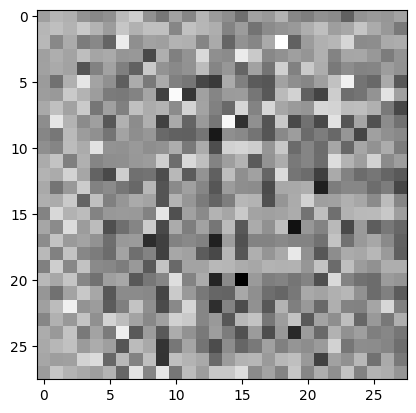

4/4 [==============================] - 1s 318ms/step
10
diskriminator_loss: 0.33559234580025077
diskriminator_accuracy: 1.0
dcgan_loss: 1.0617705583572388


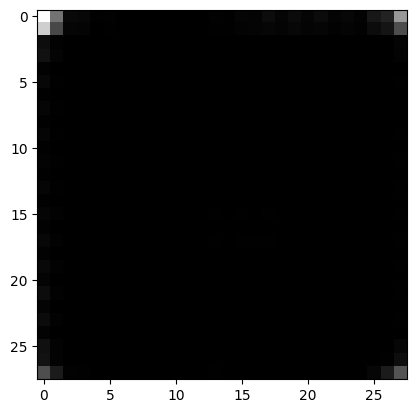

4/4 [==============================] - 1s 270ms/step
20
diskriminator_loss: 0.04749559715855867
diskriminator_accuracy: 1.0
dcgan_loss: 3.577892303466797


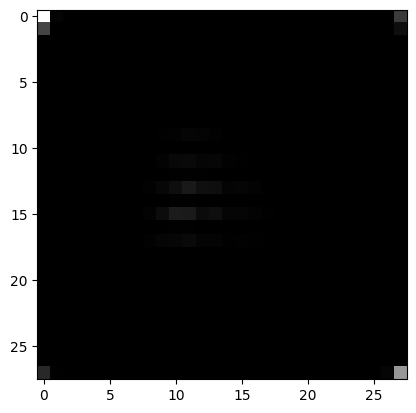

4/4 [==============================] - 1s 269ms/step
30
diskriminator_loss: 0.0598315023817122
diskriminator_accuracy: 1.0
dcgan_loss: 3.6286439895629883


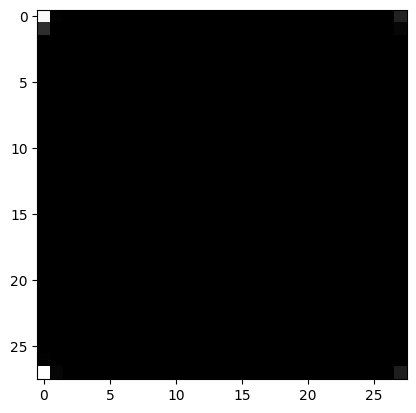

4/4 [==============================] - 1s 263ms/step
40
diskriminator_loss: 0.03665483242366463
diskriminator_accuracy: 1.0
dcgan_loss: 4.683213710784912


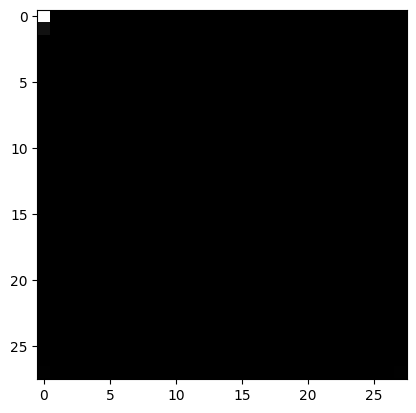

4/4 [==============================] - 1s 266ms/step
50
diskriminator_loss: 0.027575602711294778
diskriminator_accuracy: 1.0
dcgan_loss: 5.253095626831055


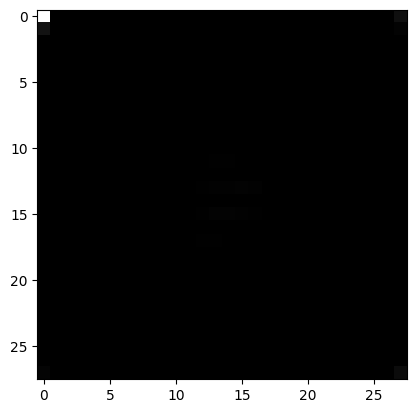

4/4 [==============================] - 1s 262ms/step
60
diskriminator_loss: 0.022856138632050715
diskriminator_accuracy: 1.0
dcgan_loss: 5.785387992858887


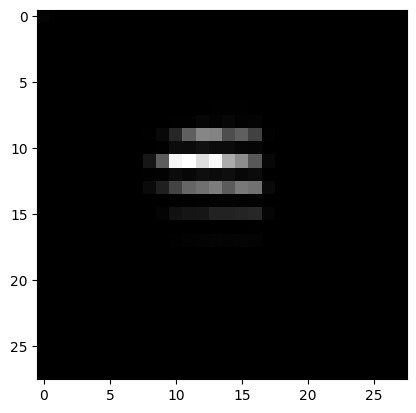

4/4 [==============================] - 1s 269ms/step
70
diskriminator_loss: 0.01927433180389926
diskriminator_accuracy: 1.0
dcgan_loss: 6.176494598388672


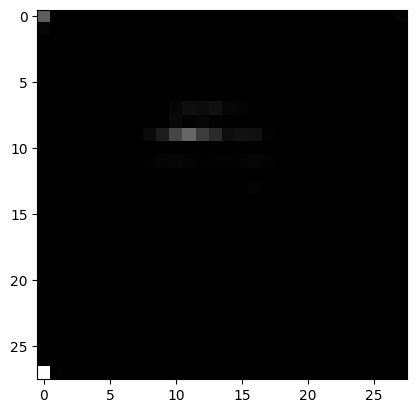

4/4 [==============================] - 1s 267ms/step
80
diskriminator_loss: 0.016306513192830607
diskriminator_accuracy: 1.0
dcgan_loss: 6.679790496826172


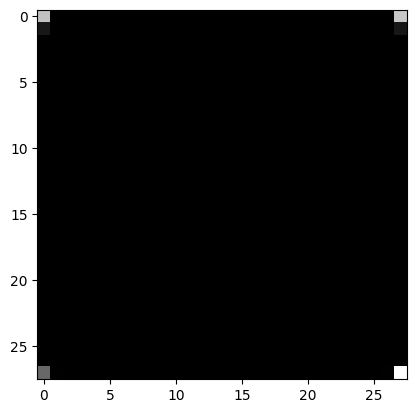

4/4 [==============================] - 1s 264ms/step
90
diskriminator_loss: 0.016311497587594204
diskriminator_accuracy: 1.0
dcgan_loss: 7.199395656585693


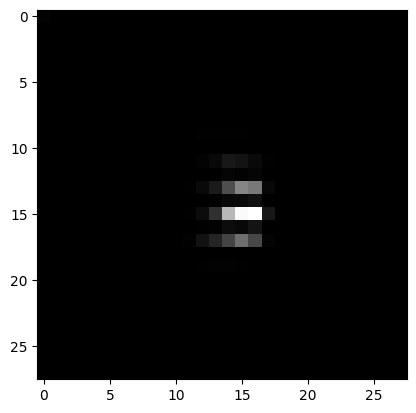

4/4 [==============================] - 1s 264ms/step
100
diskriminator_loss: 0.013213497994001955
diskriminator_accuracy: 1.0
dcgan_loss: 8.39348030090332


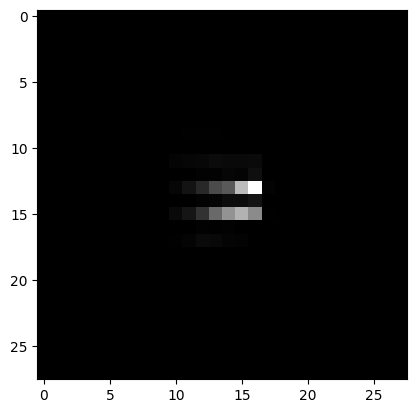

4/4 [==============================] - 1s 261ms/step
110
diskriminator_loss: 0.009960553241398884
diskriminator_accuracy: 1.0
dcgan_loss: 9.959953308105469


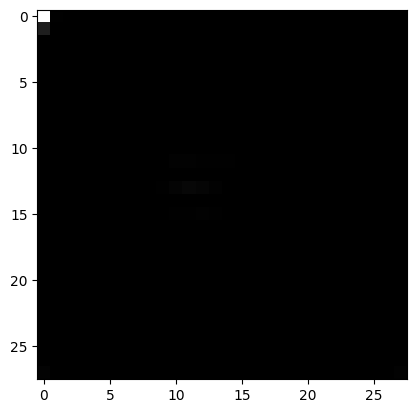

4/4 [==============================] - 1s 314ms/step
120
diskriminator_loss: 0.011136919783893973
diskriminator_accuracy: 1.0
dcgan_loss: 11.69140338897705


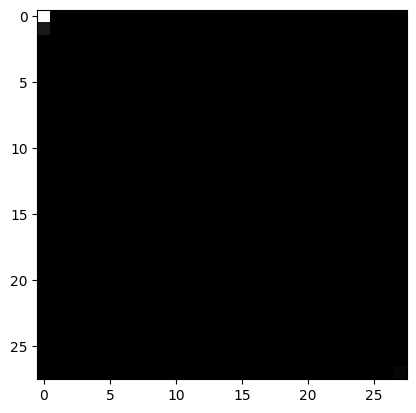

4/4 [==============================] - 1s 259ms/step
130
diskriminator_loss: 0.012365181995846797
diskriminator_accuracy: 1.0
dcgan_loss: 13.757892608642578


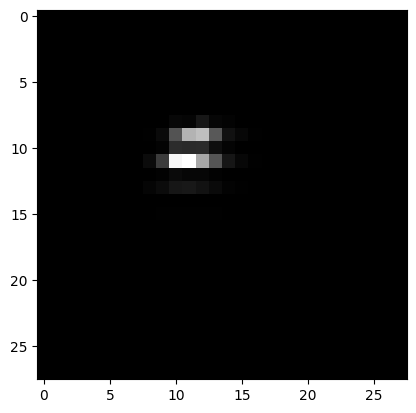

4/4 [==============================] - 1s 265ms/step
140
diskriminator_loss: 0.011192394653335214
diskriminator_accuracy: 0.99609375
dcgan_loss: 15.223708152770996


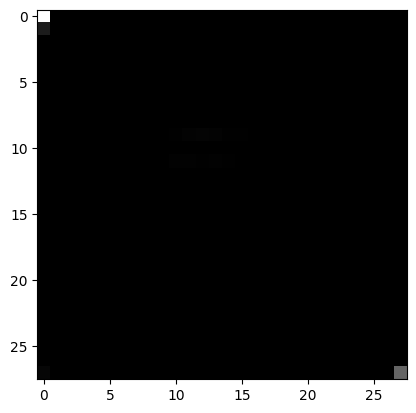

4/4 [==============================] - 1s 266ms/step
150
diskriminator_loss: 0.004524812922028332
diskriminator_accuracy: 1.0
dcgan_loss: 17.500215530395508


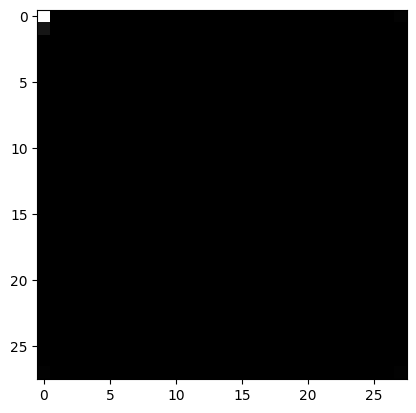

4/4 [==============================] - 2s 392ms/step
160
diskriminator_loss: 0.0063156299091211565
diskriminator_accuracy: 1.0
dcgan_loss: 19.154216766357422


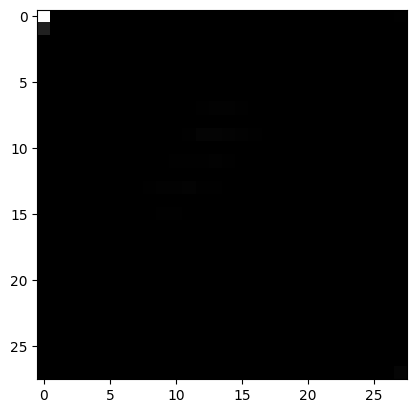

4/4 [==============================] - 1s 261ms/step
170
diskriminator_loss: 0.4186023771763207
diskriminator_accuracy: 0.765625
dcgan_loss: 25.801130294799805


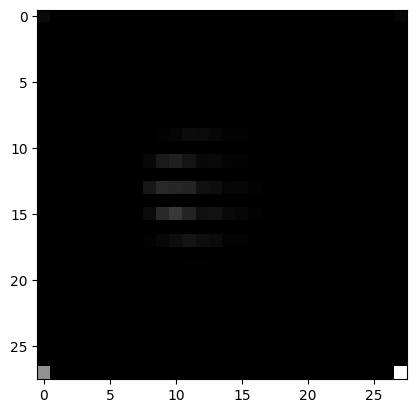

4/4 [==============================] - 1s 266ms/step
180
diskriminator_loss: 21.699427604675293
diskriminator_accuracy: 0.0
dcgan_loss: 90.06806182861328


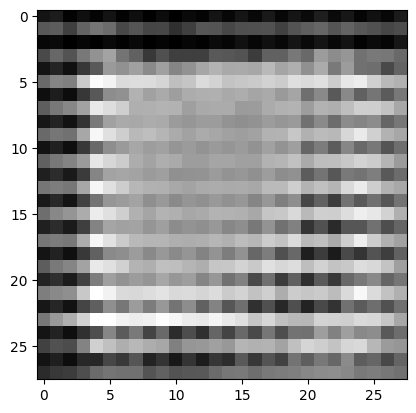

4/4 [==============================] - 1s 262ms/step
190
diskriminator_loss: 8.06859827041626
diskriminator_accuracy: 0.25
dcgan_loss: 11.153644561767578


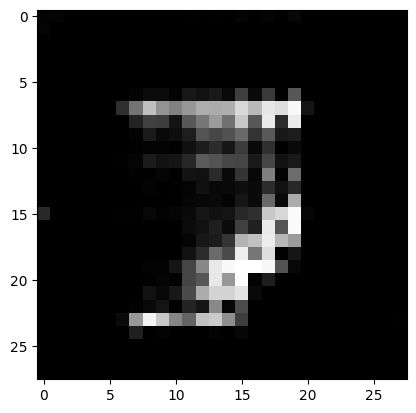

4/4 [==============================] - 1s 273ms/step
200
diskriminator_loss: 6.132141694426537
diskriminator_accuracy: 0.4609375
dcgan_loss: 5.7602434158325195


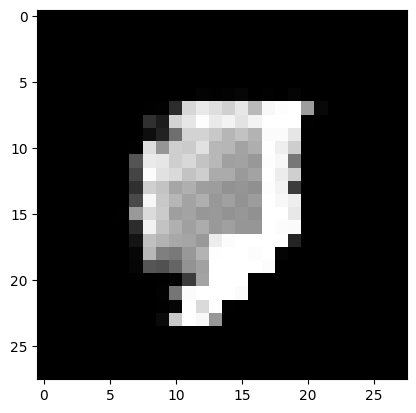

4/4 [==============================] - 1s 361ms/step
210
diskriminator_loss: 0.6348100425675511
diskriminator_accuracy: 0.80859375
dcgan_loss: 5.816127777099609


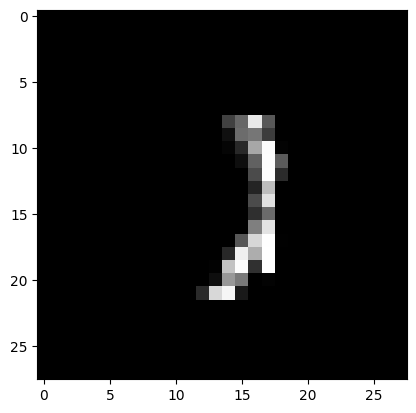

4/4 [==============================] - 1s 262ms/step
220
diskriminator_loss: 9.697358131408691
diskriminator_accuracy: 0.2109375
dcgan_loss: 5.243388652801514


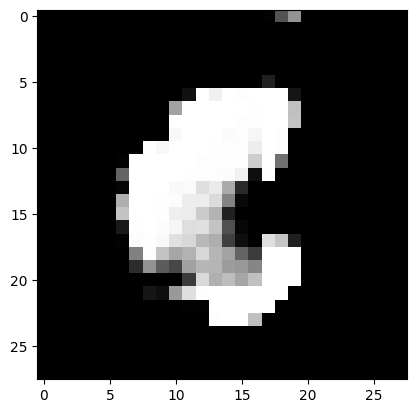

4/4 [==============================] - 1s 262ms/step
230
diskriminator_loss: 0.42991024255752563
diskriminator_accuracy: 0.84765625
dcgan_loss: 35.65418243408203


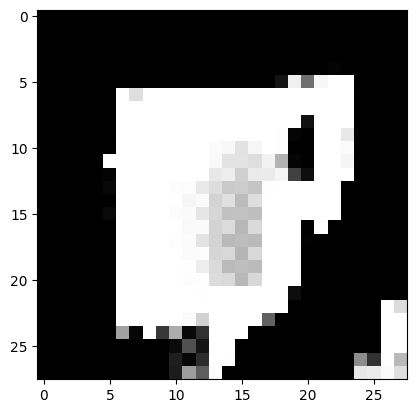

4/4 [==============================] - 1s 266ms/step
240
diskriminator_loss: 4.208942651748657
diskriminator_accuracy: 0.28515625
dcgan_loss: 16.41419792175293


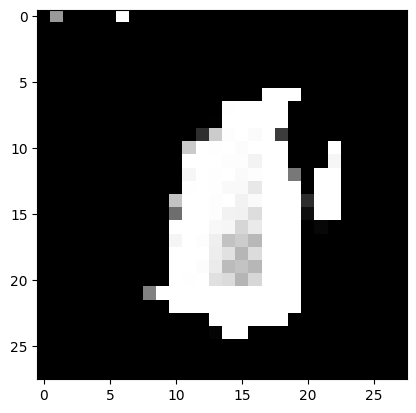

4/4 [==============================] - 1s 267ms/step
250
diskriminator_loss: 1.1240291371941566
diskriminator_accuracy: 0.46484375
dcgan_loss: 5.030385971069336


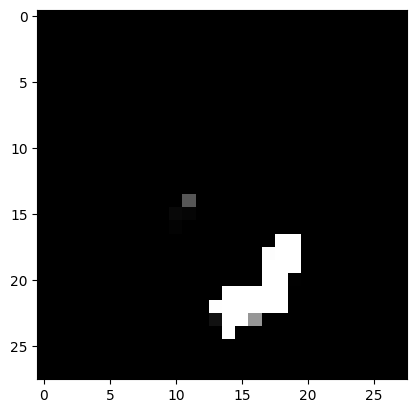

4/4 [==============================] - 1s 269ms/step
260
diskriminator_loss: 0.5780443557305261
diskriminator_accuracy: 0.73046875
dcgan_loss: 3.2479705810546875


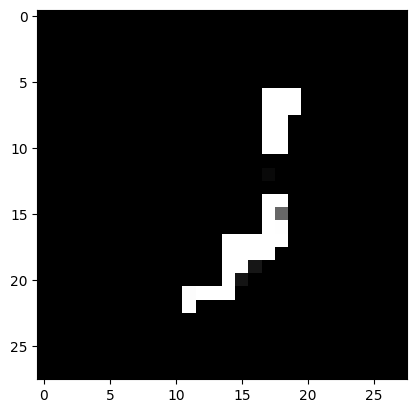

4/4 [==============================] - 1s 263ms/step
270
diskriminator_loss: 0.8951922613196075
diskriminator_accuracy: 0.72265625
dcgan_loss: 5.2505645751953125


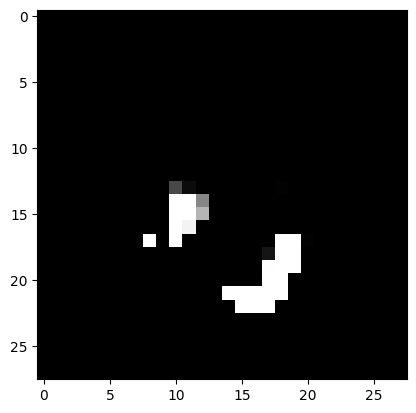

4/4 [==============================] - 1s 264ms/step
280
diskriminator_loss: 4.172883987426758
diskriminator_accuracy: 0.375
dcgan_loss: 8.173141479492188


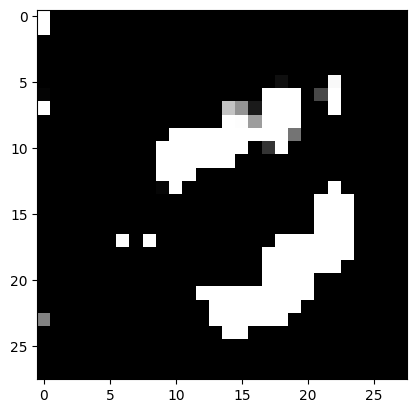

4/4 [==============================] - 1s 267ms/step
290
diskriminator_loss: 1.2631501778960228
diskriminator_accuracy: 0.72265625
dcgan_loss: 29.339540481567383


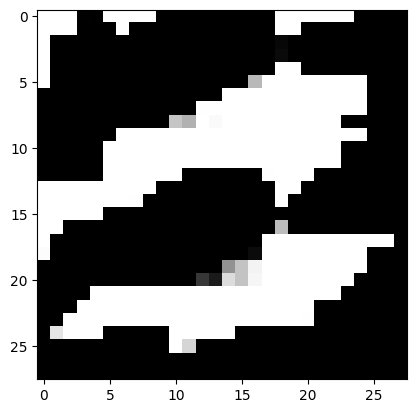

4/4 [==============================] - 1s 261ms/step
300
diskriminator_loss: 2.999506711959839
diskriminator_accuracy: 0.5
dcgan_loss: 24.699817657470703


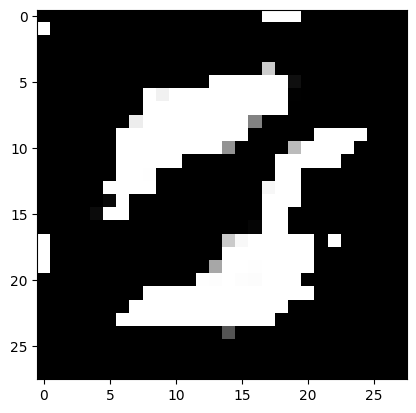

4/4 [==============================] - 1s 263ms/step
310
diskriminator_loss: 3.8764363527297974
diskriminator_accuracy: 0.30078125
dcgan_loss: 10.765607833862305


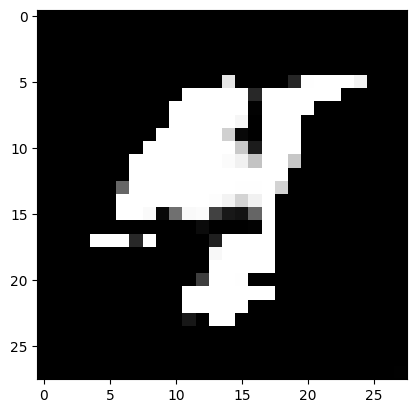

4/4 [==============================] - 2s 399ms/step
320
diskriminator_loss: 2.0170246362686157
diskriminator_accuracy: 0.58203125
dcgan_loss: 7.096591949462891


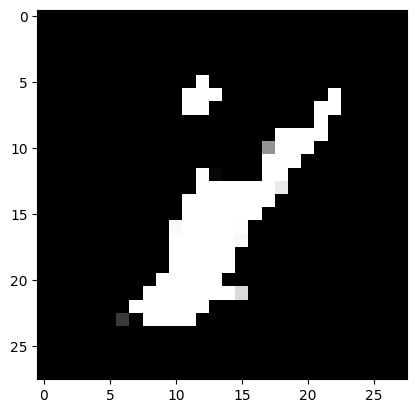

4/4 [==============================] - 1s 391ms/step
330
diskriminator_loss: 1.7432505786418915
diskriminator_accuracy: 0.63671875
dcgan_loss: 8.865059852600098


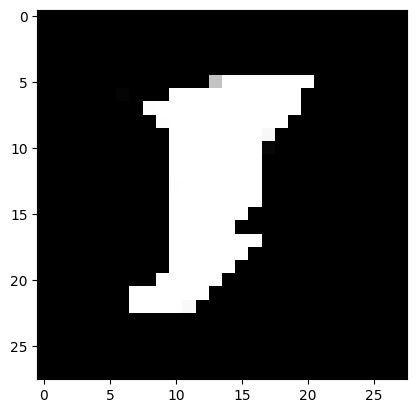

4/4 [==============================] - 1s 399ms/step
340
diskriminator_loss: 1.8687739372253418
diskriminator_accuracy: 0.58984375
dcgan_loss: 13.45884895324707


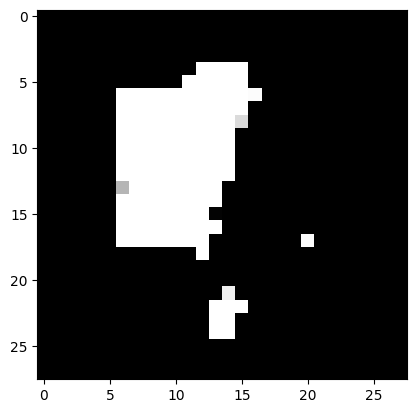

4/4 [==============================] - 2s 395ms/step
350
diskriminator_loss: 2.32400019466877
diskriminator_accuracy: 0.5625
dcgan_loss: 13.44571304321289


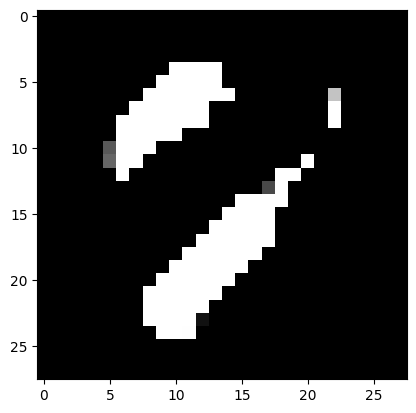

4/4 [==============================] - 1s 358ms/step
360
diskriminator_loss: 2.2477410286664963
diskriminator_accuracy: 0.52734375
dcgan_loss: 6.743633270263672


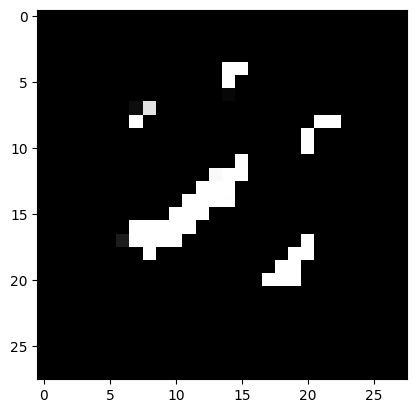

4/4 [==============================] - 1s 349ms/step
370
diskriminator_loss: 2.2568616569042206
diskriminator_accuracy: 0.51171875
dcgan_loss: 5.045650482177734


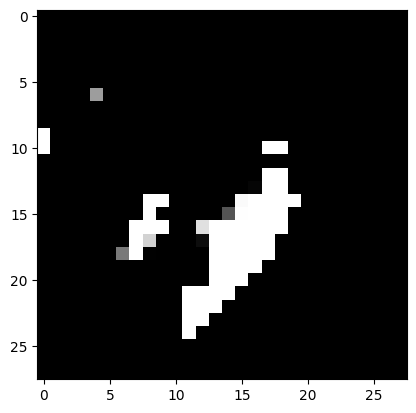

4/4 [==============================] - 2s 413ms/step
380
diskriminator_loss: 3.0766581892967224
diskriminator_accuracy: 0.37890625
dcgan_loss: 4.757009983062744


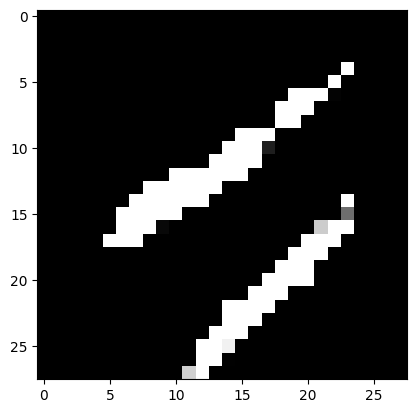

4/4 [==============================] - 1s 276ms/step
390
diskriminator_loss: 2.869032621383667
diskriminator_accuracy: 0.34765625
dcgan_loss: 12.07436752319336


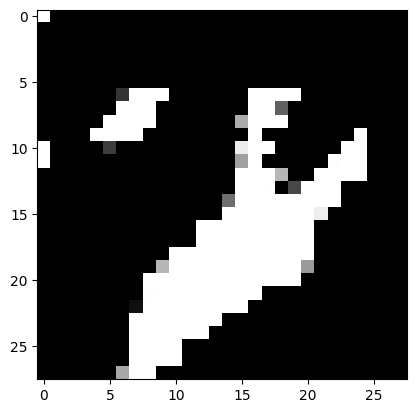

4/4 [==============================] - 1s 266ms/step
400
diskriminator_loss: 2.631914436817169
diskriminator_accuracy: 0.46875
dcgan_loss: 10.327162742614746


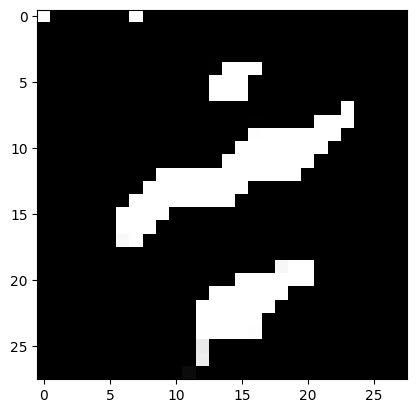

4/4 [==============================] - 1s 262ms/step
410
diskriminator_loss: 1.6685594320297241
diskriminator_accuracy: 0.515625
dcgan_loss: 6.04091215133667


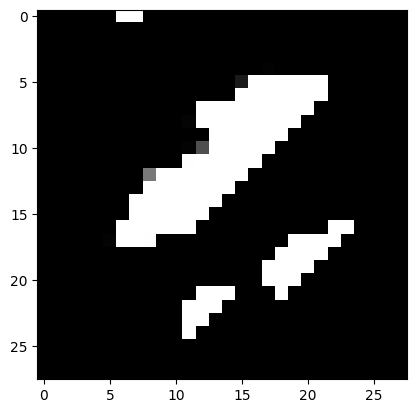

4/4 [==============================] - 1s 270ms/step
420
diskriminator_loss: 1.3112992495298386
diskriminator_accuracy: 0.65234375
dcgan_loss: 5.494669437408447


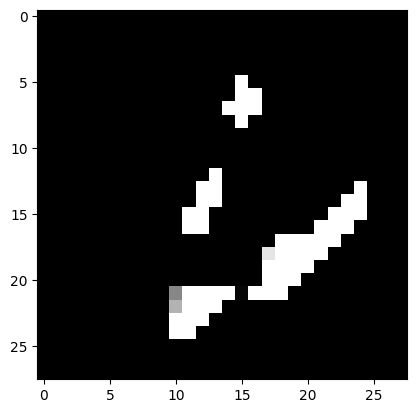

4/4 [==============================] - 2s 394ms/step
430
diskriminator_loss: 2.170358717441559
diskriminator_accuracy: 0.53125
dcgan_loss: 5.347799777984619


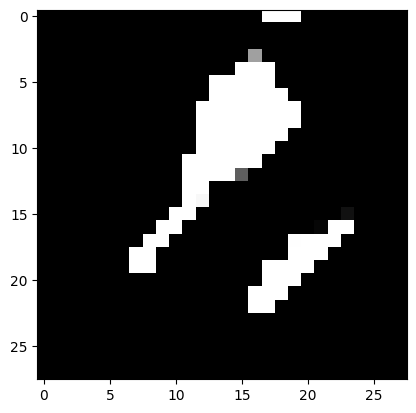

4/4 [==============================] - 1s 262ms/step
440
diskriminator_loss: 3.1553508043289185
diskriminator_accuracy: 0.27734375
dcgan_loss: 6.037387847900391


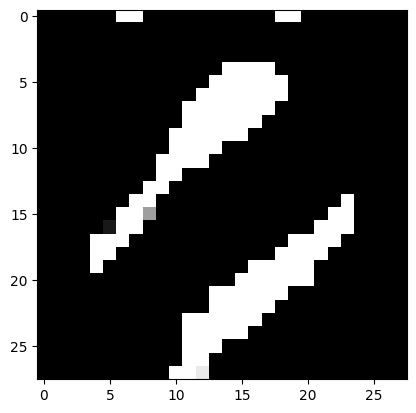

4/4 [==============================] - 1s 264ms/step
450
diskriminator_loss: 3.371657371520996
diskriminator_accuracy: 0.33984375
dcgan_loss: 7.7105560302734375


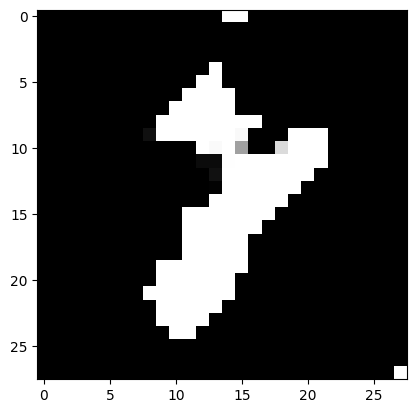

4/4 [==============================] - 1s 270ms/step
460
diskriminator_loss: 3.393005222082138
diskriminator_accuracy: 0.30078125
dcgan_loss: 5.266083717346191


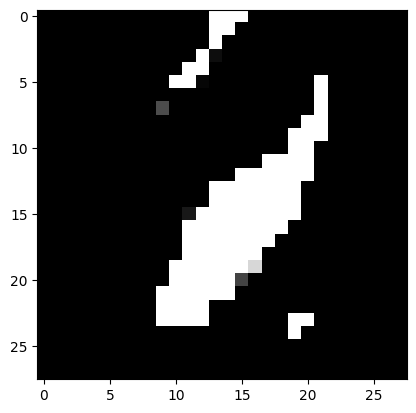

4/4 [==============================] - 1s 266ms/step
470
diskriminator_loss: 2.471758782863617
diskriminator_accuracy: 0.375
dcgan_loss: 4.054316997528076


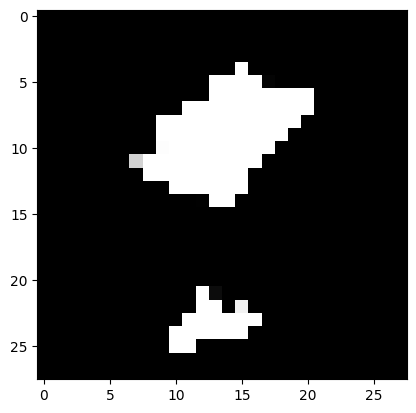

4/4 [==============================] - 1s 274ms/step
480
diskriminator_loss: 2.0732555985450745
diskriminator_accuracy: 0.4140625
dcgan_loss: 4.7939534187316895


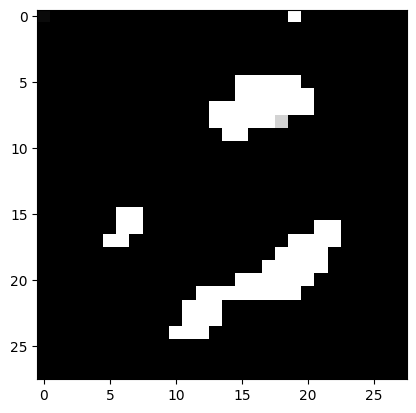

4/4 [==============================] - 1s 267ms/step
490
diskriminator_loss: 2.5457868576049805
diskriminator_accuracy: 0.40234375
dcgan_loss: 4.821329116821289


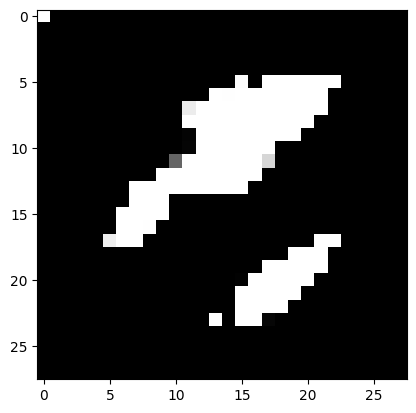

4/4 [==============================] - 2s 401ms/step
500
diskriminator_loss: 2.561409592628479
diskriminator_accuracy: 0.37890625
dcgan_loss: 4.957267761230469


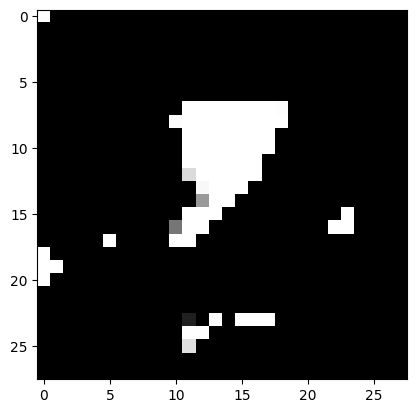

4/4 [==============================] - 1s 270ms/step
510
diskriminator_loss: 2.5717135071754456
diskriminator_accuracy: 0.36328125
dcgan_loss: 5.073423862457275


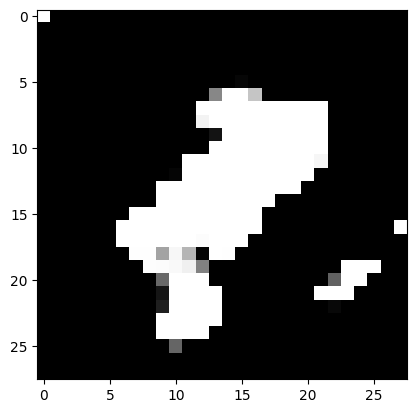

4/4 [==============================] - 1s 272ms/step
520
diskriminator_loss: 2.5373364090919495
diskriminator_accuracy: 0.3203125
dcgan_loss: 5.369300365447998


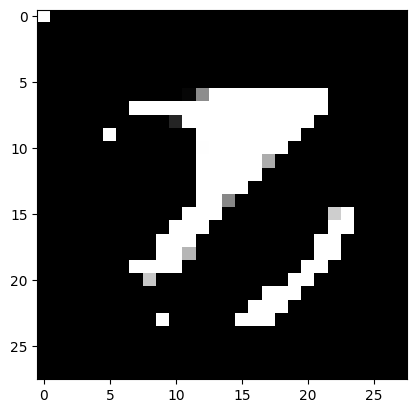

4/4 [==============================] - 1s 268ms/step
530
diskriminator_loss: 2.700278639793396
diskriminator_accuracy: 0.37890625
dcgan_loss: 3.8626441955566406


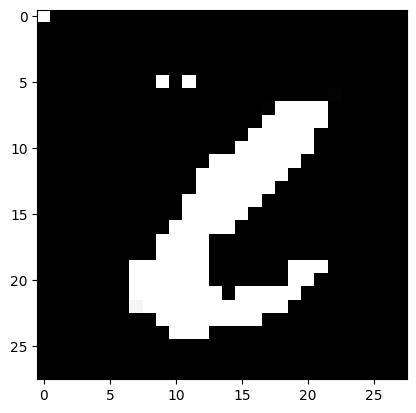

4/4 [==============================] - 1s 318ms/step
540
diskriminator_loss: 2.491126537322998
diskriminator_accuracy: 0.37890625
dcgan_loss: 3.972416400909424


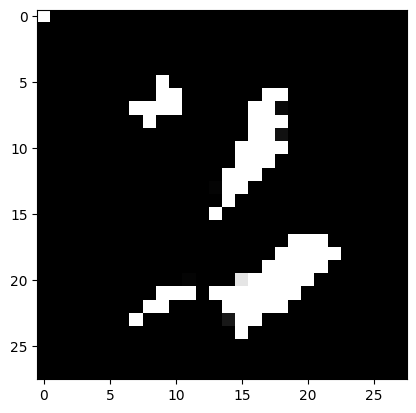

4/4 [==============================] - 2s 394ms/step
550
diskriminator_loss: 2.417057752609253
diskriminator_accuracy: 0.40234375
dcgan_loss: 4.085925579071045


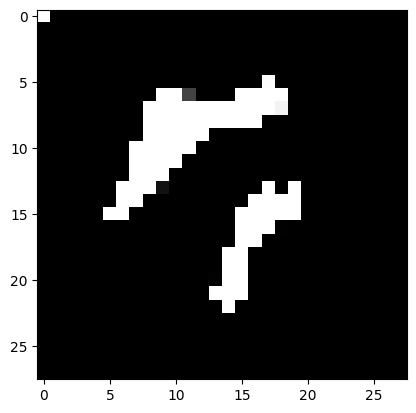

4/4 [==============================] - 1s 263ms/step
560
diskriminator_loss: 2.1985380947589874
diskriminator_accuracy: 0.39453125
dcgan_loss: 4.853432655334473


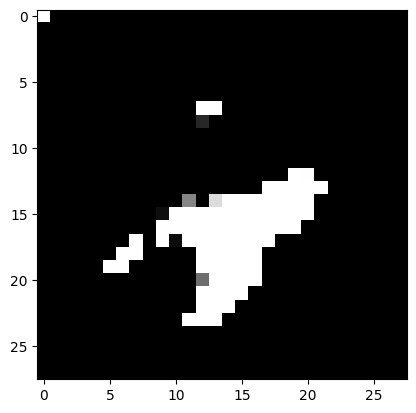

4/4 [==============================] - 1s 267ms/step
570
diskriminator_loss: 2.424649655818939
diskriminator_accuracy: 0.40625
dcgan_loss: 4.900400161743164


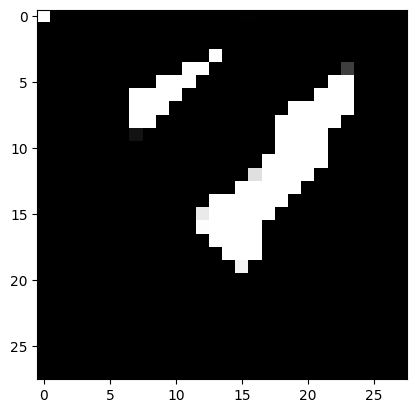

4/4 [==============================] - 1s 268ms/step
580
diskriminator_loss: 2.468216150999069
diskriminator_accuracy: 0.36328125
dcgan_loss: 5.636727809906006


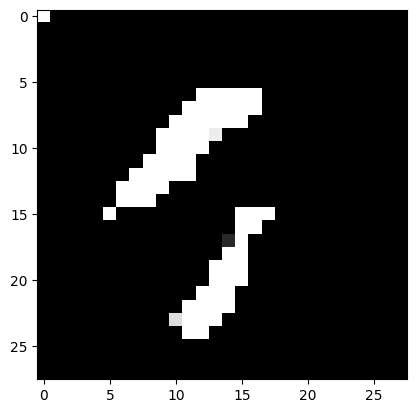

4/4 [==============================] - 1s 350ms/step
590
diskriminator_loss: 2.2347371727228165
diskriminator_accuracy: 0.44140625
dcgan_loss: 5.085535049438477


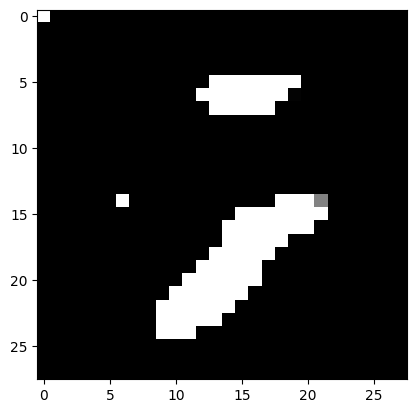

4/4 [==============================] - 2s 401ms/step
600
diskriminator_loss: 2.1018255054950714
diskriminator_accuracy: 0.40234375
dcgan_loss: 5.429864883422852


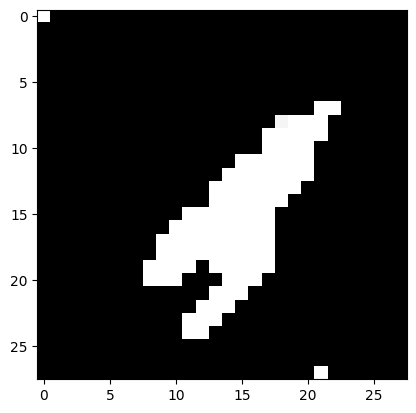

4/4 [==============================] - 2s 409ms/step
610
diskriminator_loss: 2.299780160188675
diskriminator_accuracy: 0.390625
dcgan_loss: 4.925970554351807


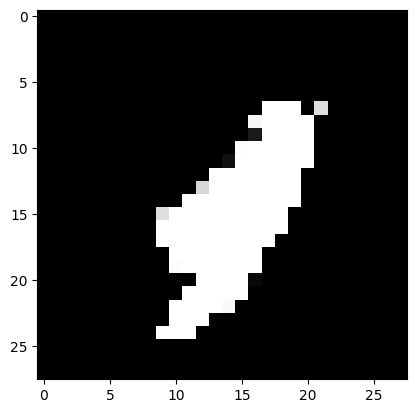

4/4 [==============================] - 1s 265ms/step
620
diskriminator_loss: 2.599360942840576
diskriminator_accuracy: 0.4140625
dcgan_loss: 3.762047290802002


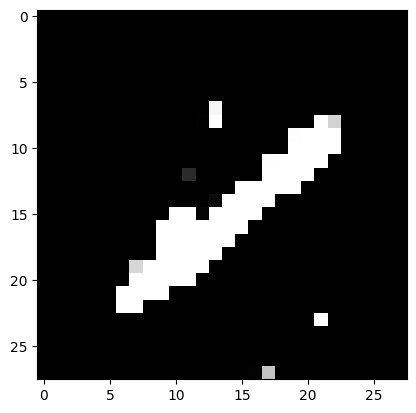

4/4 [==============================] - 1s 268ms/step
630
diskriminator_loss: 2.266706258058548
diskriminator_accuracy: 0.40625
dcgan_loss: 3.8484485149383545


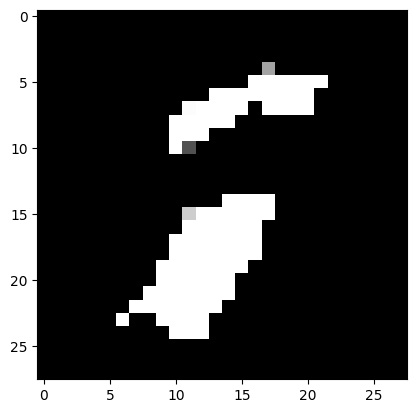

4/4 [==============================] - 1s 265ms/step
640
diskriminator_loss: 2.1303871870040894
diskriminator_accuracy: 0.40234375
dcgan_loss: 4.691350936889648


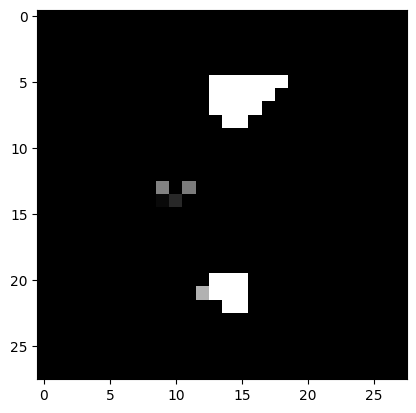

4/4 [==============================] - 1s 330ms/step
650
diskriminator_loss: 2.5963003039360046
diskriminator_accuracy: 0.40234375
dcgan_loss: 4.483060836791992


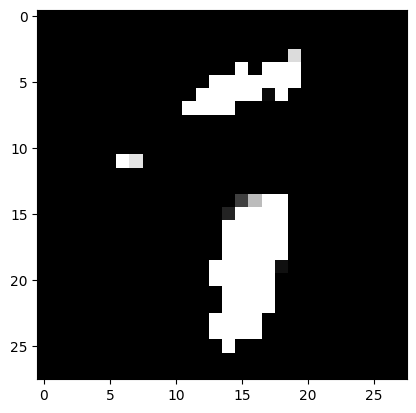

4/4 [==============================] - 1s 277ms/step
660
diskriminator_loss: 2.449974089860916
diskriminator_accuracy: 0.39453125
dcgan_loss: 4.568778038024902


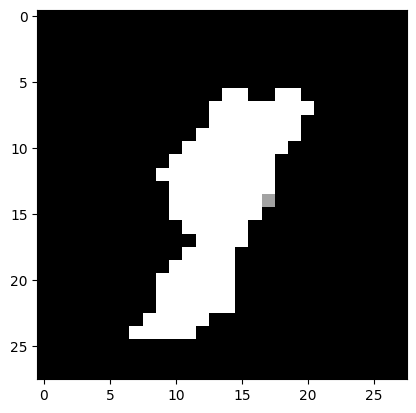

4/4 [==============================] - 1s 276ms/step
670
diskriminator_loss: 2.6327085494995117
diskriminator_accuracy: 0.359375
dcgan_loss: 4.247438907623291


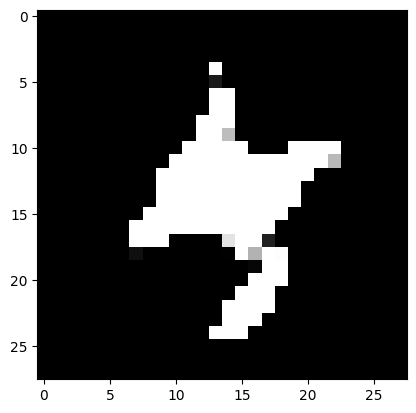

4/4 [==============================] - 1s 273ms/step
680
diskriminator_loss: 2.717497020959854
diskriminator_accuracy: 0.41796875
dcgan_loss: 4.092851161956787


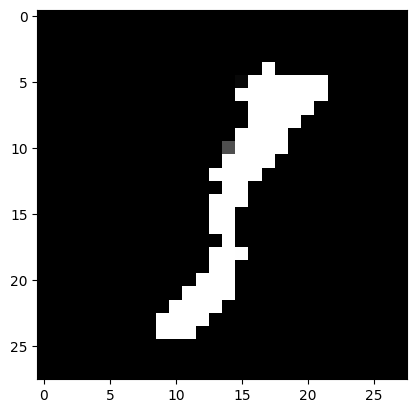

4/4 [==============================] - 1s 269ms/step
690
diskriminator_loss: 2.7514136731624603
diskriminator_accuracy: 0.41796875
dcgan_loss: 4.114229679107666


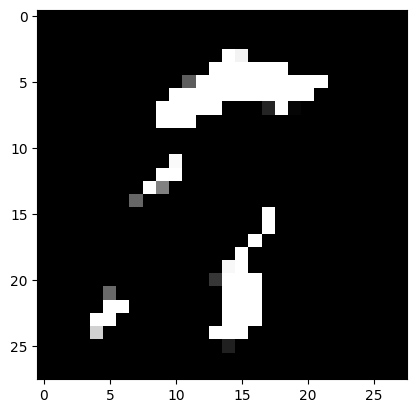

4/4 [==============================] - 1s 267ms/step
700
diskriminator_loss: 2.5183990597724915
diskriminator_accuracy: 0.41796875
dcgan_loss: 4.600053787231445


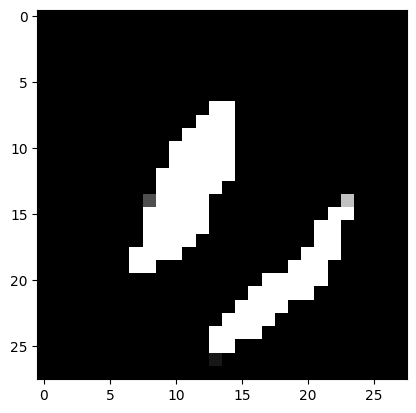

4/4 [==============================] - 2s 457ms/step
710
diskriminator_loss: 2.9450430274009705
diskriminator_accuracy: 0.34375
dcgan_loss: 4.367135524749756


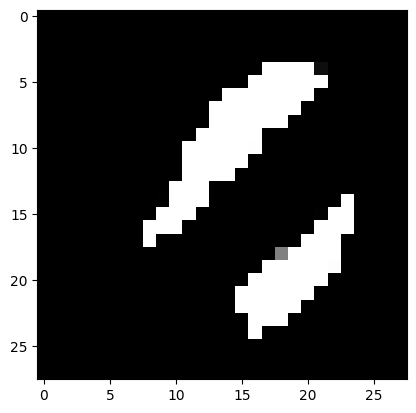

4/4 [==============================] - 1s 278ms/step
720
diskriminator_loss: 2.5664125084877014
diskriminator_accuracy: 0.4296875
dcgan_loss: 4.117733478546143


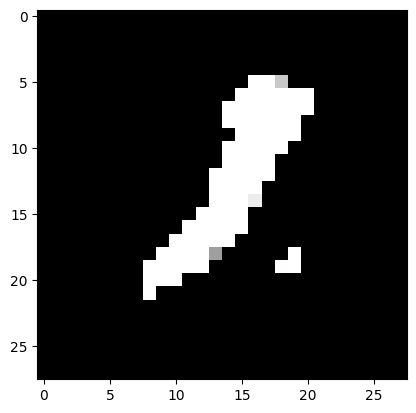

4/4 [==============================] - 1s 278ms/step
730
diskriminator_loss: 2.8046755492687225
diskriminator_accuracy: 0.421875
dcgan_loss: 4.450784683227539


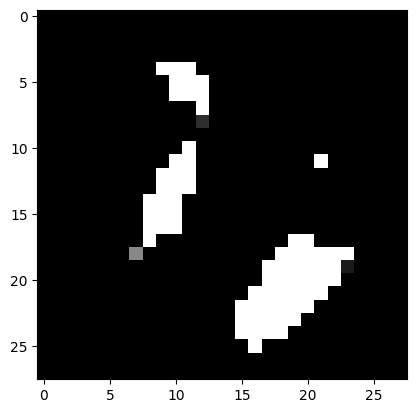

4/4 [==============================] - 1s 337ms/step
740
diskriminator_loss: 3.222440004348755
diskriminator_accuracy: 0.359375
dcgan_loss: 4.359992504119873


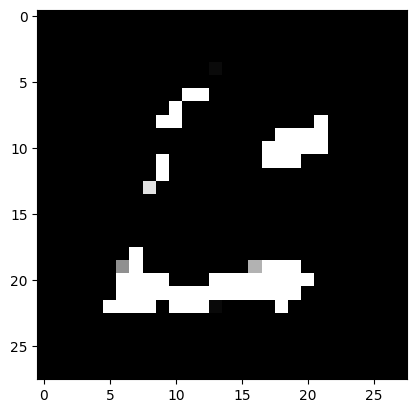

4/4 [==============================] - 1s 270ms/step
750
diskriminator_loss: 2.953599750995636
diskriminator_accuracy: 0.37890625
dcgan_loss: 4.542262554168701


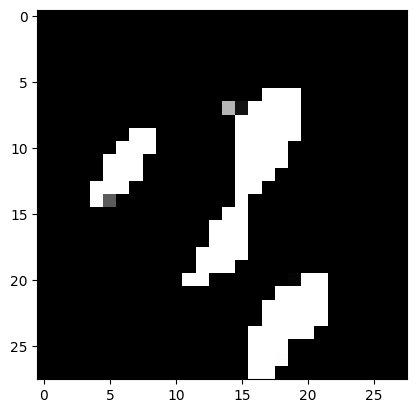

4/4 [==============================] - 1s 325ms/step
760
diskriminator_loss: 3.196762979030609
diskriminator_accuracy: 0.38671875
dcgan_loss: 4.723099708557129


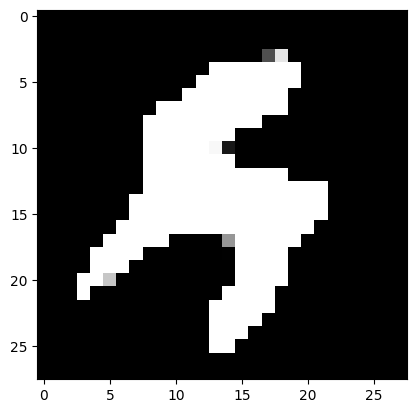

4/4 [==============================] - 1s 276ms/step
770
diskriminator_loss: 2.854110673069954
diskriminator_accuracy: 0.42578125
dcgan_loss: 4.740822792053223


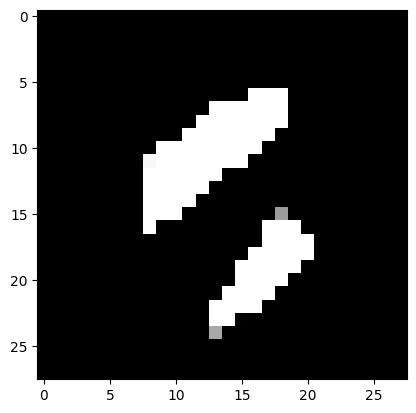

4/4 [==============================] - 1s 272ms/step
780
diskriminator_loss: 3.0142966508865356
diskriminator_accuracy: 0.37109375
dcgan_loss: 4.020401477813721


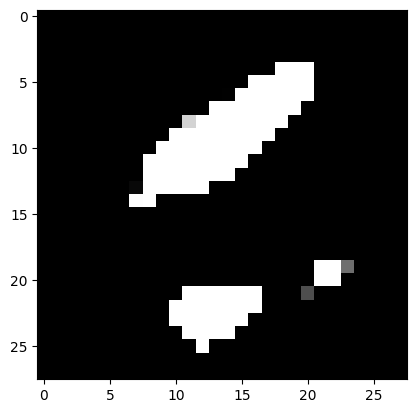

4/4 [==============================] - 1s 277ms/step
790
diskriminator_loss: 3.0287822484970093
diskriminator_accuracy: 0.41796875
dcgan_loss: 4.788761615753174


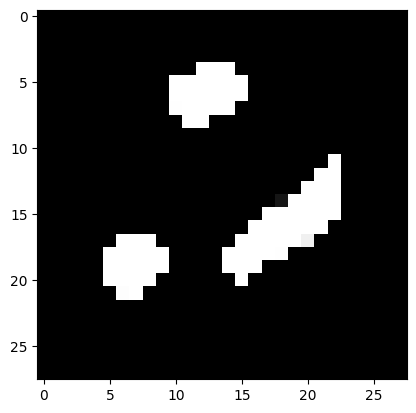

4/4 [==============================] - 1s 275ms/step
800
diskriminator_loss: 3.5188290774822235
diskriminator_accuracy: 0.3125
dcgan_loss: 4.519752502441406


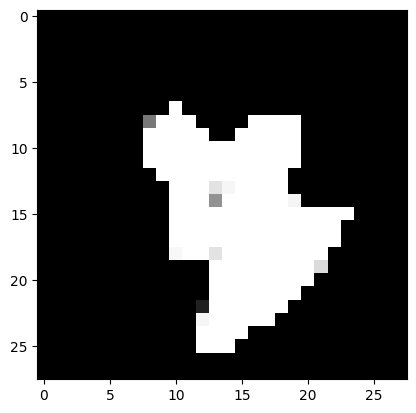

4/4 [==============================] - 2s 401ms/step
810
diskriminator_loss: 3.5220805406570435
diskriminator_accuracy: 0.38671875
dcgan_loss: 4.6874589920043945


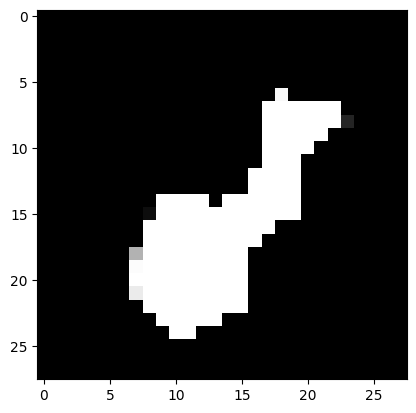

4/4 [==============================] - 1s 268ms/step
820
diskriminator_loss: 3.534653961658478
diskriminator_accuracy: 0.3828125
dcgan_loss: 4.6369428634643555


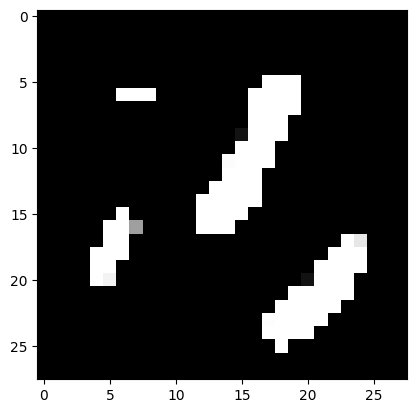

4/4 [==============================] - 1s 276ms/step
830
diskriminator_loss: 3.385123074054718
diskriminator_accuracy: 0.35546875
dcgan_loss: 4.250121593475342


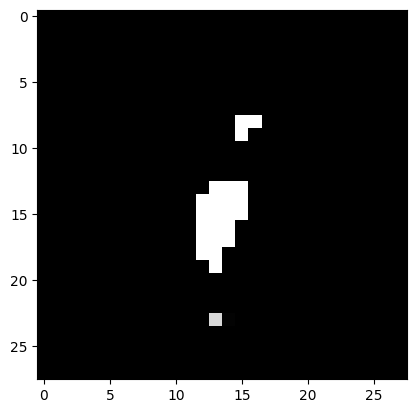

4/4 [==============================] - 1s 275ms/step
840
diskriminator_loss: 3.0720841884613037
diskriminator_accuracy: 0.40625
dcgan_loss: 4.995023727416992


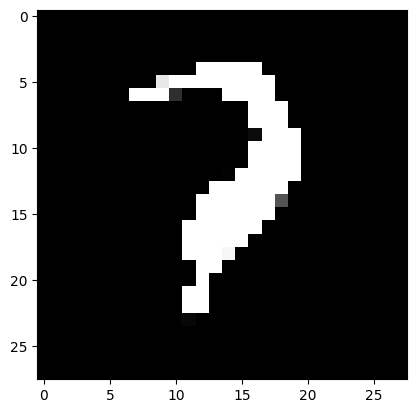

4/4 [==============================] - 2s 381ms/step
850
diskriminator_loss: 3.95453679561615
diskriminator_accuracy: 0.2890625
dcgan_loss: 5.149579048156738


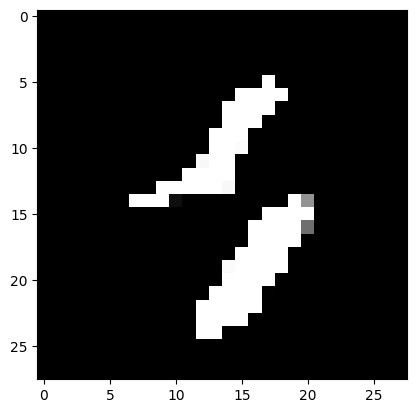

4/4 [==============================] - 1s 273ms/step
860
diskriminator_loss: 4.183239698410034
diskriminator_accuracy: 0.3984375
dcgan_loss: 5.632096290588379


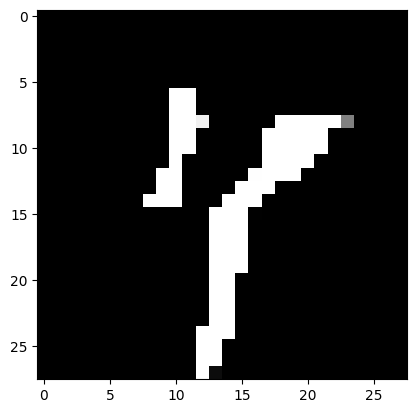

4/4 [==============================] - 2s 401ms/step
870
diskriminator_loss: 3.7174072861671448
diskriminator_accuracy: 0.41796875
dcgan_loss: 4.438848495483398


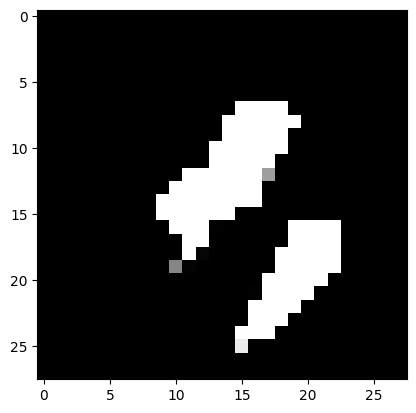

4/4 [==============================] - 2s 412ms/step
880
diskriminator_loss: 2.697281390428543
diskriminator_accuracy: 0.48828125
dcgan_loss: 4.217747688293457


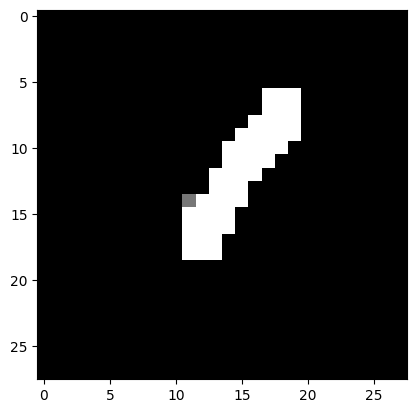

4/4 [==============================] - 1s 271ms/step
890
diskriminator_loss: 3.91577485203743
diskriminator_accuracy: 0.33203125
dcgan_loss: 4.470749855041504


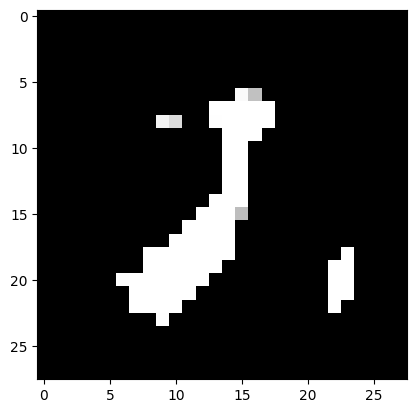

4/4 [==============================] - 2s 401ms/step
900
diskriminator_loss: 4.064993262290955
diskriminator_accuracy: 0.34375
dcgan_loss: 8.815900802612305


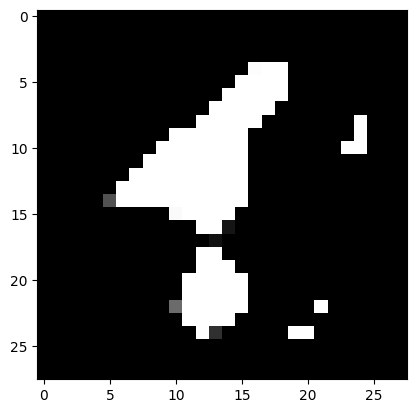

4/4 [==============================] - 1s 268ms/step
910
diskriminator_loss: 4.745254576206207
diskriminator_accuracy: 0.37109375
dcgan_loss: 5.136451721191406


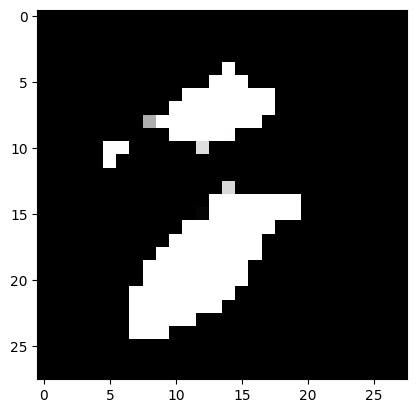

4/4 [==============================] - 1s 310ms/step
920
diskriminator_loss: 2.13300159573555
diskriminator_accuracy: 0.5078125
dcgan_loss: 4.2135329246521


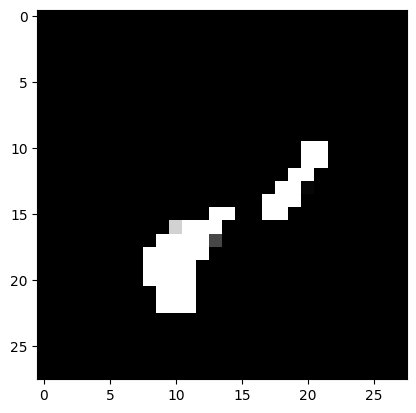

4/4 [==============================] - 1s 337ms/step
930
diskriminator_loss: 2.405049905180931
diskriminator_accuracy: 0.57421875
dcgan_loss: 3.6342782974243164


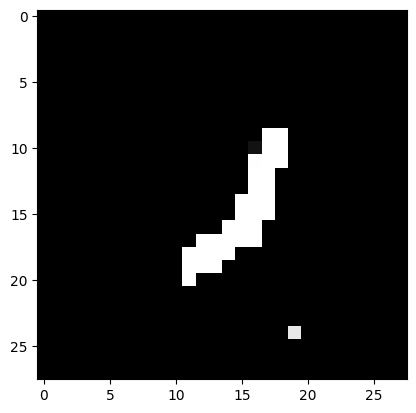

4/4 [==============================] - 1s 272ms/step
940
diskriminator_loss: 4.48837423324585
diskriminator_accuracy: 0.3203125
dcgan_loss: 4.172256946563721


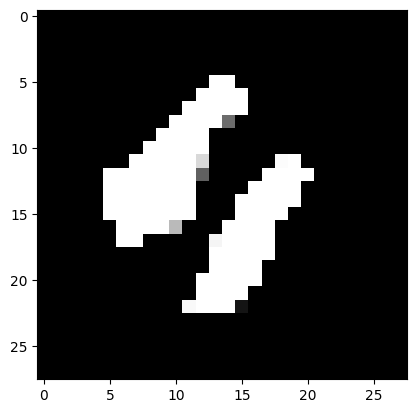

4/4 [==============================] - 1s 272ms/step
950
diskriminator_loss: 4.811242520809174
diskriminator_accuracy: 0.39453125
dcgan_loss: 10.953290939331055


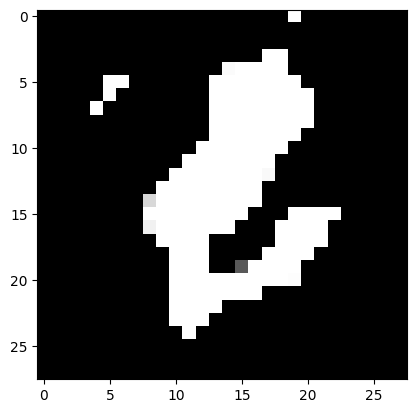

4/4 [==============================] - 1s 275ms/step
960
diskriminator_loss: 5.776897758245468
diskriminator_accuracy: 0.3671875
dcgan_loss: 7.481504440307617


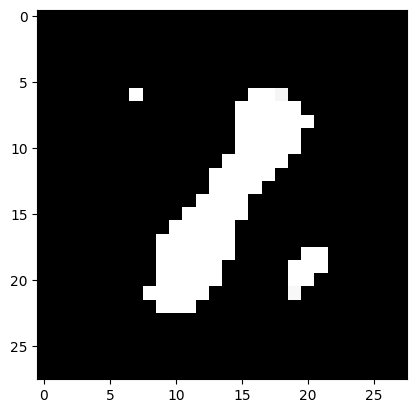

4/4 [==============================] - 1s 275ms/step
970
diskriminator_loss: 2.5972363352775574
diskriminator_accuracy: 0.4140625
dcgan_loss: 3.703385829925537


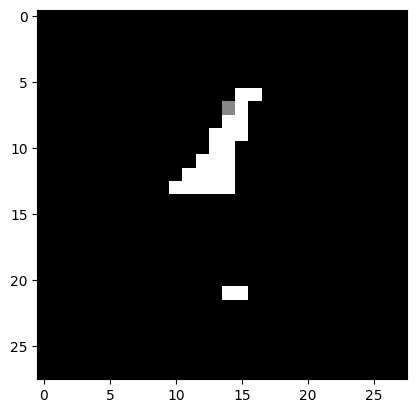

4/4 [==============================] - 2s 386ms/step
980
diskriminator_loss: 1.6783096296712756
diskriminator_accuracy: 0.6484375
dcgan_loss: 5.1001996994018555


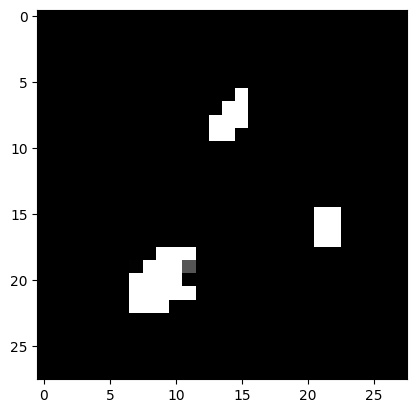

4/4 [==============================] - 1s 313ms/step
990
diskriminator_loss: 3.301796019077301
diskriminator_accuracy: 0.4375
dcgan_loss: 5.992636680603027


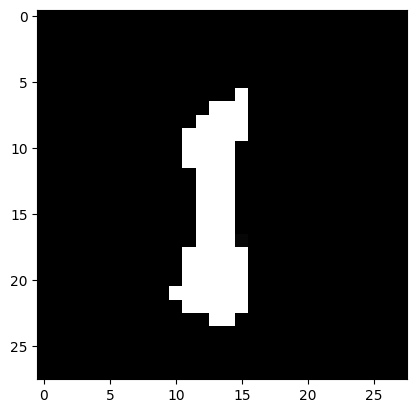

4/4 [==============================] - 1s 269ms/step
1000
diskriminator_loss: 6.5441272258758545
diskriminator_accuracy: 0.20703125
dcgan_loss: 5.2069244384765625


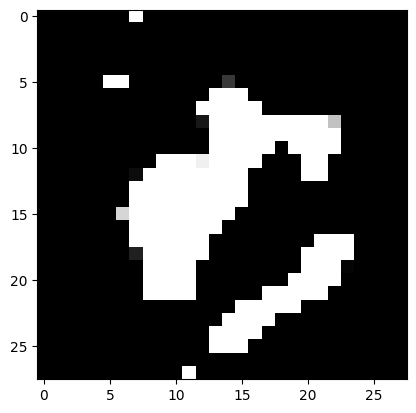

4/4 [==============================] - 1s 269ms/step
1010
diskriminator_loss: 4.590092241764069
diskriminator_accuracy: 0.390625
dcgan_loss: 13.087076187133789


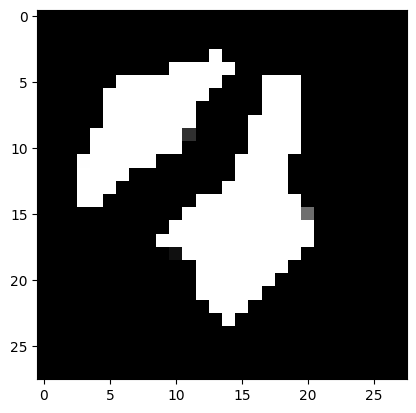

4/4 [==============================] - 1s 275ms/step
1020
diskriminator_loss: 5.965694636106491
diskriminator_accuracy: 0.44140625
dcgan_loss: 8.138468742370605


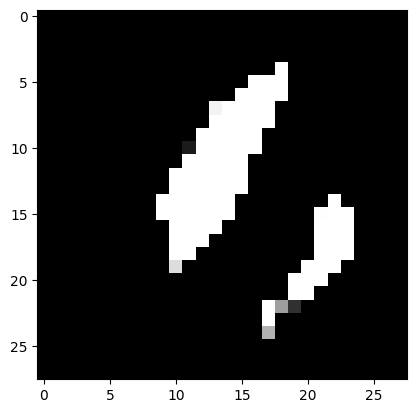

4/4 [==============================] - 1s 271ms/step
1030
diskriminator_loss: 4.265114963054657
diskriminator_accuracy: 0.40234375
dcgan_loss: 2.8949687480926514


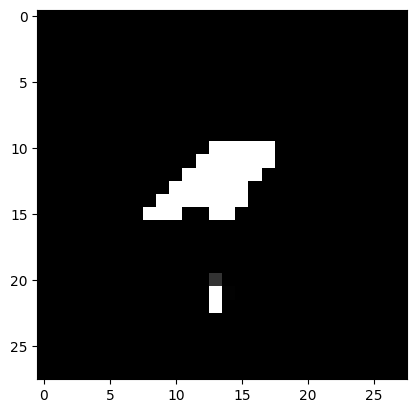

4/4 [==============================] - 2s 392ms/step
1040
diskriminator_loss: 1.2233751229941845
diskriminator_accuracy: 0.6640625
dcgan_loss: 5.137272834777832


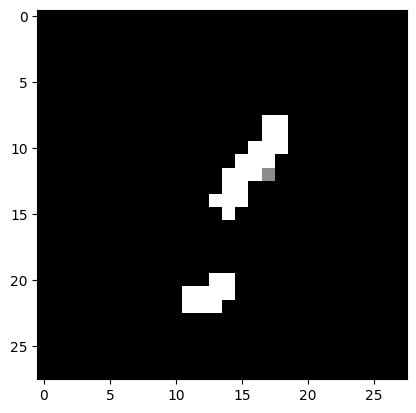

4/4 [==============================] - 1s 279ms/step
1050
diskriminator_loss: 2.1166287511587143
diskriminator_accuracy: 0.55859375
dcgan_loss: 5.974776268005371


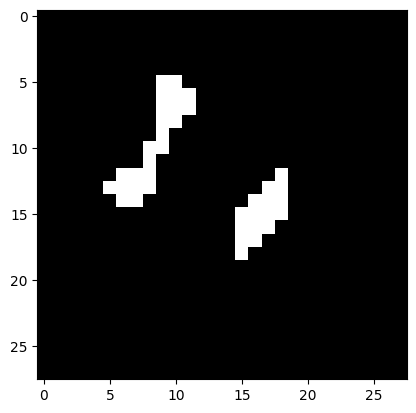

4/4 [==============================] - 1s 270ms/step
1060
diskriminator_loss: 4.633837044239044
diskriminator_accuracy: 0.33984375
dcgan_loss: 5.023012161254883


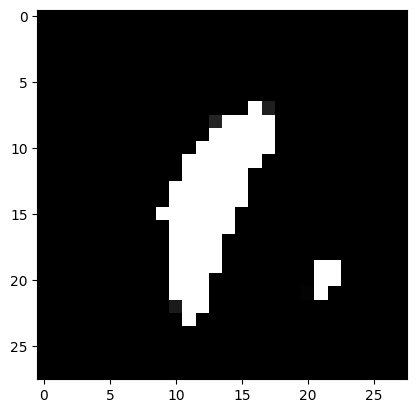

4/4 [==============================] - 1s 271ms/step
1070
diskriminator_loss: 5.206258654594421
diskriminator_accuracy: 0.2578125
dcgan_loss: 6.567201614379883


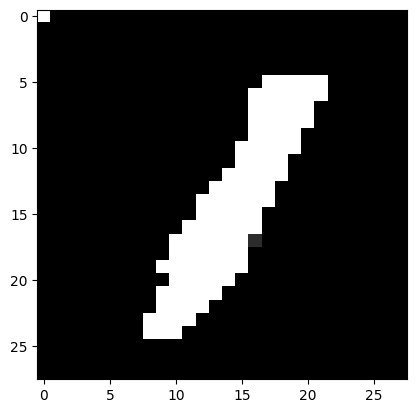

4/4 [==============================] - 1s 277ms/step
1080
diskriminator_loss: 4.9236975610256195
diskriminator_accuracy: 0.4140625
dcgan_loss: 11.080255508422852


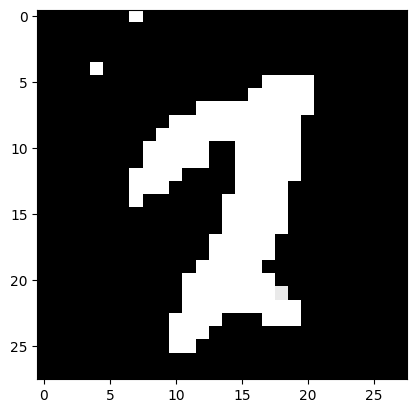

4/4 [==============================] - 2s 417ms/step
1090
diskriminator_loss: 5.76294606924057
diskriminator_accuracy: 0.41015625
dcgan_loss: 9.227692604064941


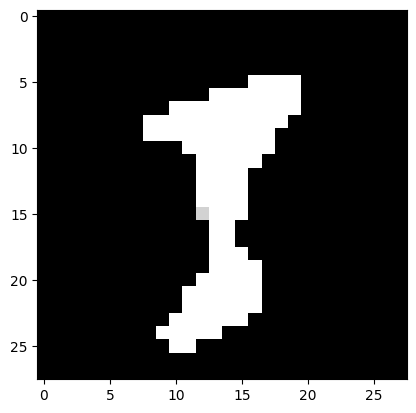

4/4 [==============================] - 1s 269ms/step
1100
diskriminator_loss: 5.218960285186768
diskriminator_accuracy: 0.37109375
dcgan_loss: 4.377902507781982


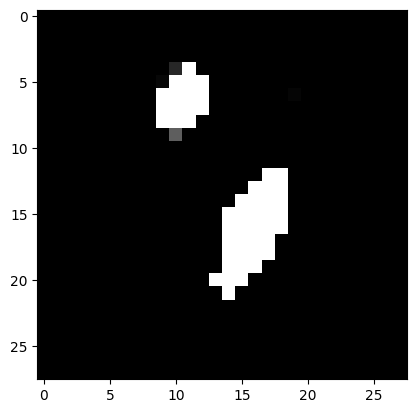

4/4 [==============================] - 1s 271ms/step
1110
diskriminator_loss: 2.5759171843528748
diskriminator_accuracy: 0.44921875
dcgan_loss: 4.494640350341797


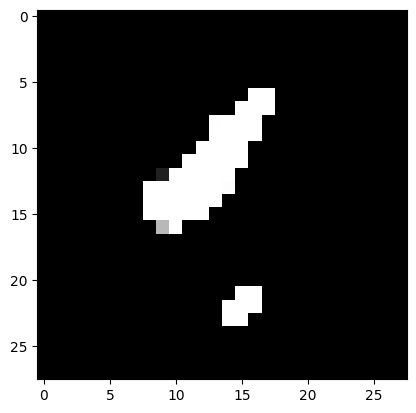

4/4 [==============================] - 1s 276ms/step
1120
diskriminator_loss: 1.7456139773130417
diskriminator_accuracy: 0.5859375
dcgan_loss: 5.944931983947754


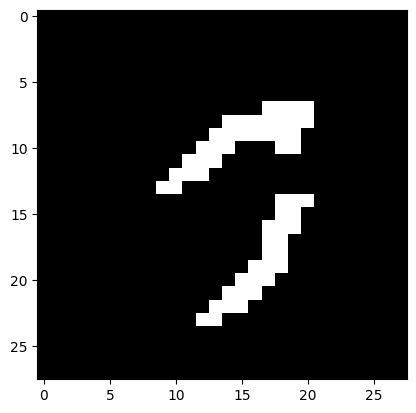

4/4 [==============================] - 1s 269ms/step
1130
diskriminator_loss: 2.752073884010315
diskriminator_accuracy: 0.453125
dcgan_loss: 6.299112319946289


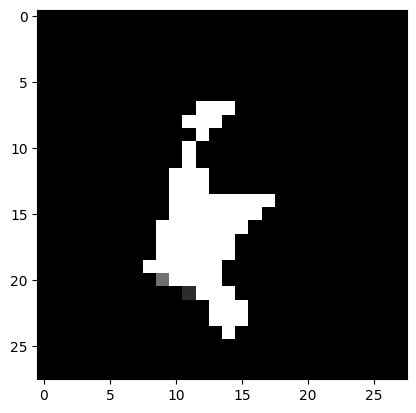

4/4 [==============================] - 2s 440ms/step
1140
diskriminator_loss: 4.4180861711502075
diskriminator_accuracy: 0.3515625
dcgan_loss: 5.3262457847595215


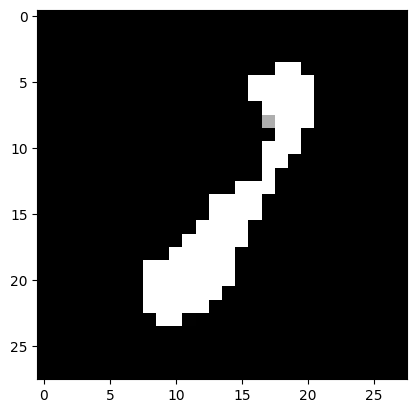

4/4 [==============================] - 2s 394ms/step
1150
diskriminator_loss: 5.04597270488739
diskriminator_accuracy: 0.3359375
dcgan_loss: 5.220149040222168


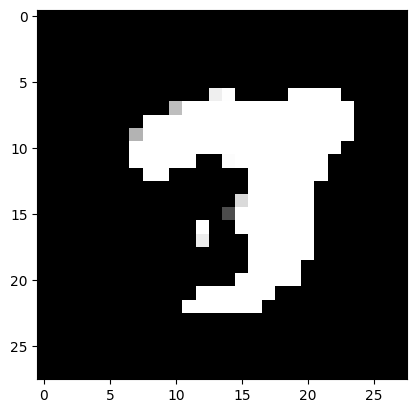

4/4 [==============================] - 1s 272ms/step
1160
diskriminator_loss: 5.46319255232811
diskriminator_accuracy: 0.3671875
dcgan_loss: 6.236723899841309


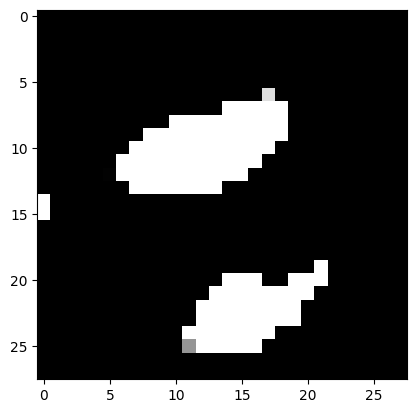

4/4 [==============================] - 1s 280ms/step
1170
diskriminator_loss: 5.653963267803192
diskriminator_accuracy: 0.38671875
dcgan_loss: 6.649806976318359


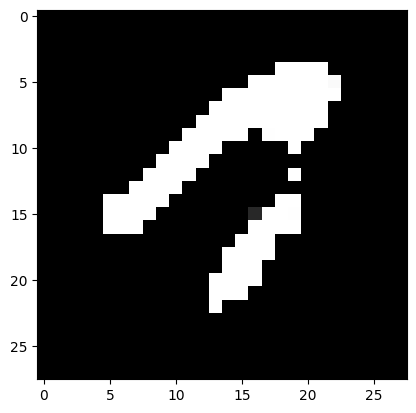

4/4 [==============================] - 1s 276ms/step
1180
diskriminator_loss: 5.611906975507736
diskriminator_accuracy: 0.40234375
dcgan_loss: 4.79311466217041


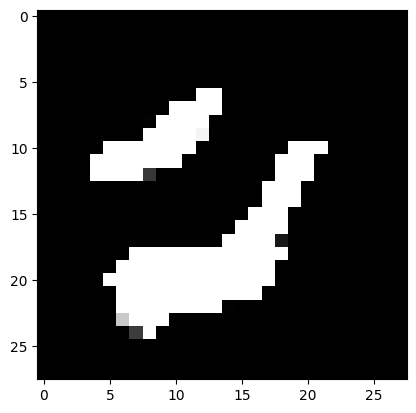

4/4 [==============================] - 1s 264ms/step
1190
diskriminator_loss: 4.3755181431770325
diskriminator_accuracy: 0.39453125
dcgan_loss: 5.199393272399902


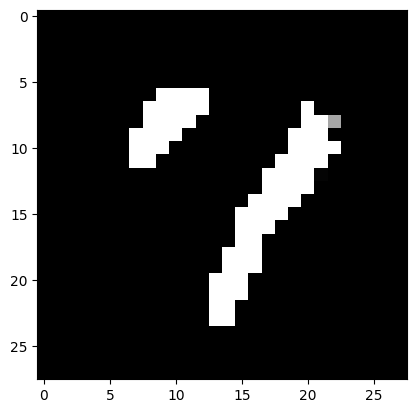

4/4 [==============================] - 1s 271ms/step
1200
diskriminator_loss: 3.8572227358818054
diskriminator_accuracy: 0.43359375
dcgan_loss: 5.174652099609375


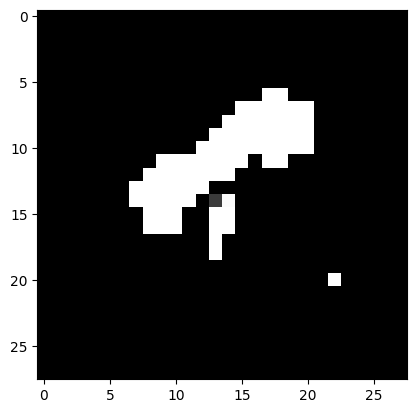

4/4 [==============================] - 1s 272ms/step
1210
diskriminator_loss: 4.228568583726883
diskriminator_accuracy: 0.375
dcgan_loss: 5.818244457244873


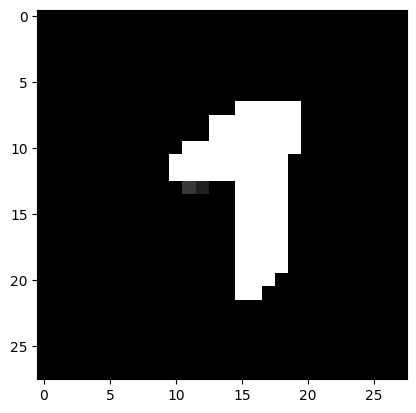

4/4 [==============================] - 1s 271ms/step
1220
diskriminator_loss: 5.181034684181213
diskriminator_accuracy: 0.36328125
dcgan_loss: 5.643369197845459


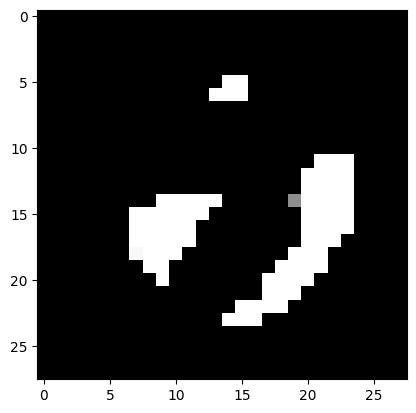

4/4 [==============================] - 1s 276ms/step
1230
diskriminator_loss: 5.706301331520081
diskriminator_accuracy: 0.359375
dcgan_loss: 5.549042701721191


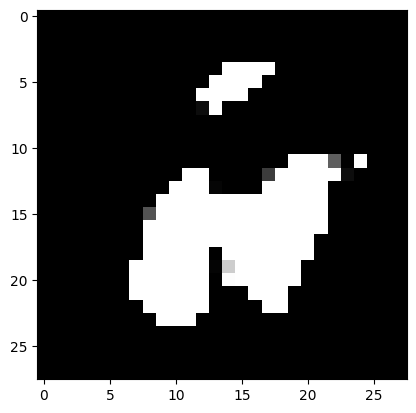

4/4 [==============================] - 1s 272ms/step
1240
diskriminator_loss: 5.738004267215729
diskriminator_accuracy: 0.42578125
dcgan_loss: 6.623560428619385


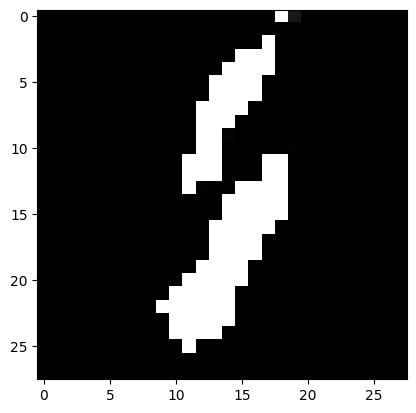

4/4 [==============================] - 1s 274ms/step
1250
diskriminator_loss: 5.100300878286362
diskriminator_accuracy: 0.42578125
dcgan_loss: 5.257113933563232


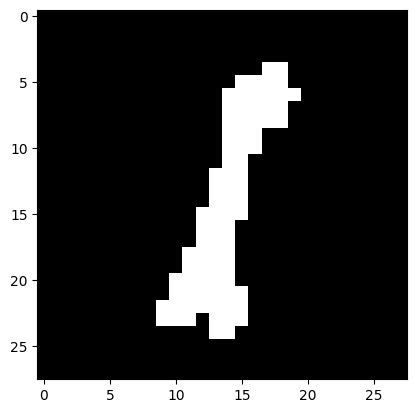

4/4 [==============================] - 1s 370ms/step
1260
diskriminator_loss: 4.528049409389496
diskriminator_accuracy: 0.4375
dcgan_loss: 5.000726699829102


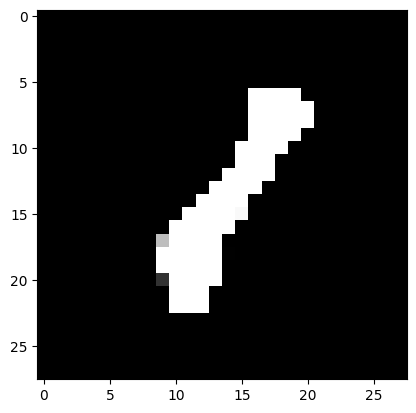

4/4 [==============================] - 2s 395ms/step
1270
diskriminator_loss: 3.113925516605377
diskriminator_accuracy: 0.46875
dcgan_loss: 5.837922096252441


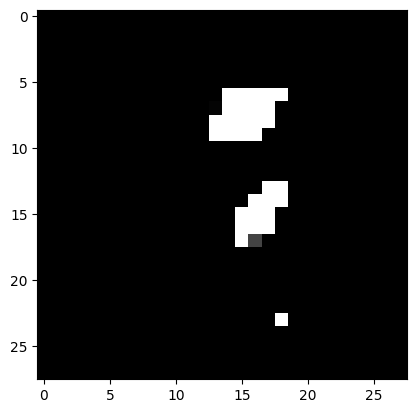

4/4 [==============================] - 1s 273ms/step
1280
diskriminator_loss: 4.455884605646133
diskriminator_accuracy: 0.4140625
dcgan_loss: 6.333548069000244


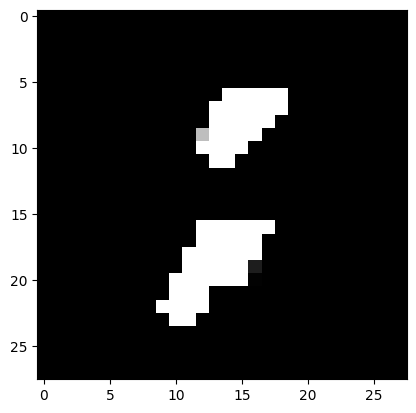

4/4 [==============================] - 1s 275ms/step
1290
diskriminator_loss: 5.028842747211456
diskriminator_accuracy: 0.43359375
dcgan_loss: 6.012347221374512


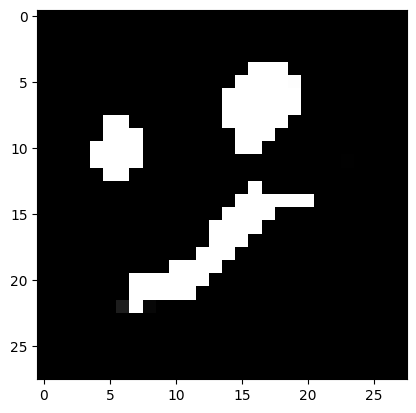

4/4 [==============================] - 1s 273ms/step
1300
diskriminator_loss: 6.163158059120178
diskriminator_accuracy: 0.375
dcgan_loss: 6.962257385253906


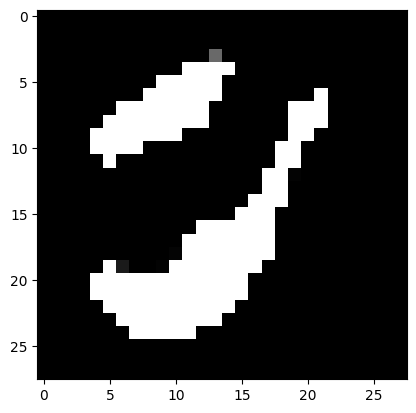

4/4 [==============================] - 1s 276ms/step
1310
diskriminator_loss: 6.805354326963425
diskriminator_accuracy: 0.39453125
dcgan_loss: 6.746864318847656


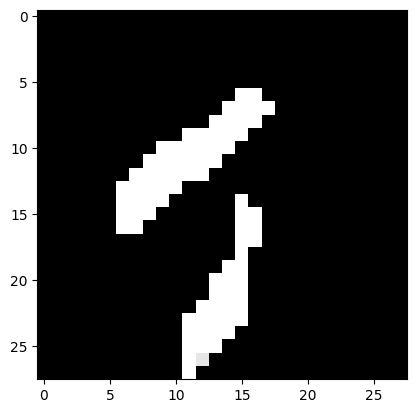

4/4 [==============================] - 2s 398ms/step
1320
diskriminator_loss: 6.008165001869202
diskriminator_accuracy: 0.3671875
dcgan_loss: 6.448694229125977


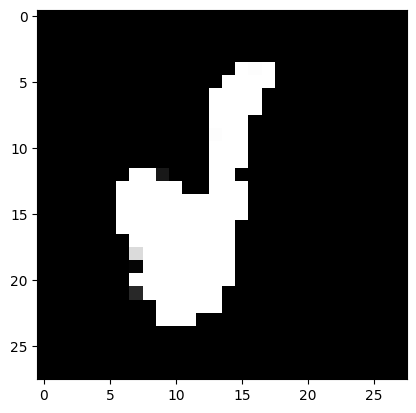

4/4 [==============================] - 1s 276ms/step
1330
diskriminator_loss: 5.396873354911804
diskriminator_accuracy: 0.375
dcgan_loss: 5.584098815917969


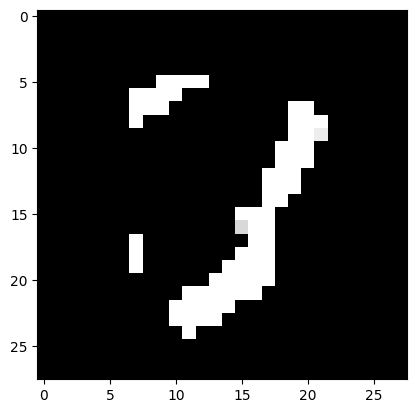

4/4 [==============================] - 1s 270ms/step
1340
diskriminator_loss: 4.503945142030716
diskriminator_accuracy: 0.43359375
dcgan_loss: 6.079904556274414


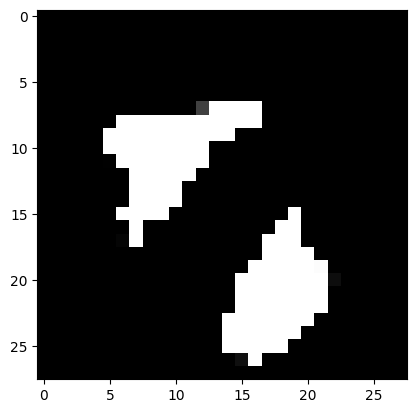

4/4 [==============================] - 1s 271ms/step
1350
diskriminator_loss: 5.911377787590027
diskriminator_accuracy: 0.4296875
dcgan_loss: 7.342050552368164


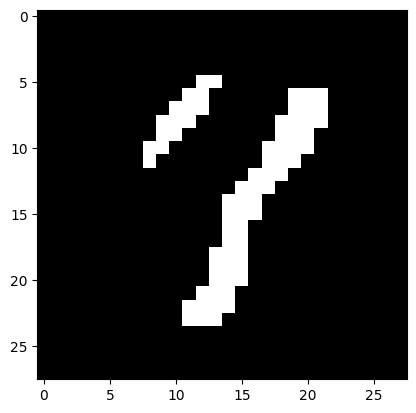

4/4 [==============================] - 1s 272ms/step
1360
diskriminator_loss: 6.503335952758789
diskriminator_accuracy: 0.4140625
dcgan_loss: 6.7755818367004395


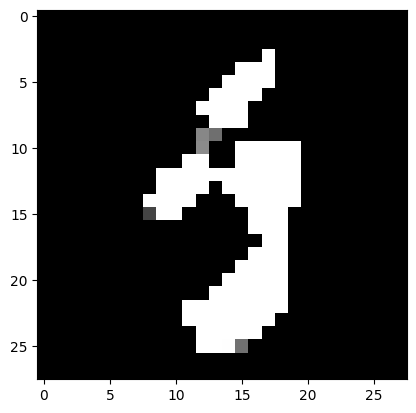

4/4 [==============================] - 2s 407ms/step
1370
diskriminator_loss: 8.240408957004547
diskriminator_accuracy: 0.359375
dcgan_loss: 8.852950096130371


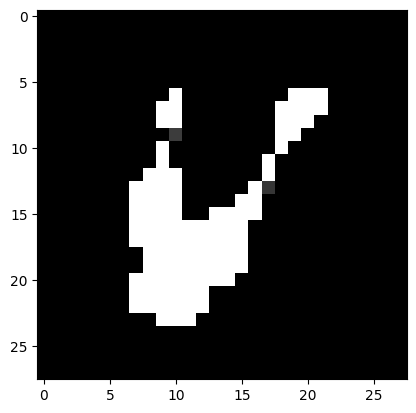

4/4 [==============================] - 1s 271ms/step
1380
diskriminator_loss: 7.551741063594818
diskriminator_accuracy: 0.42578125
dcgan_loss: 7.109583854675293


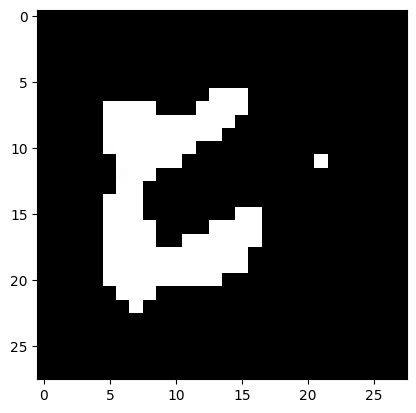

4/4 [==============================] - 1s 272ms/step
1390
diskriminator_loss: 6.4970177710056305
diskriminator_accuracy: 0.4296875
dcgan_loss: 6.354775905609131


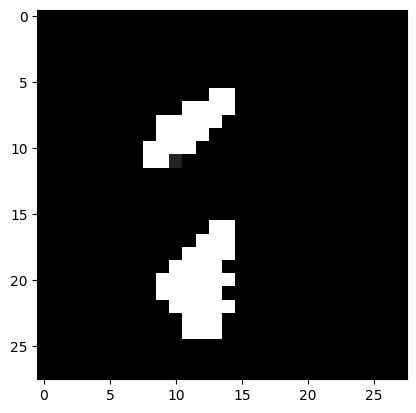

4/4 [==============================] - 1s 270ms/step
1400
diskriminator_loss: 4.579700529575348
diskriminator_accuracy: 0.46875
dcgan_loss: 9.846843719482422


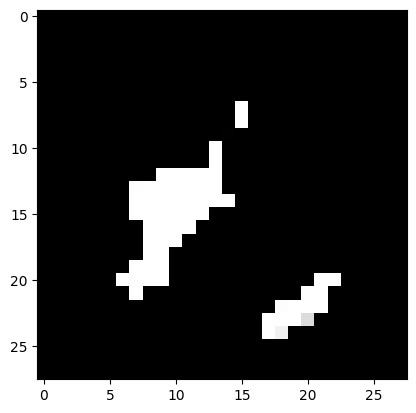

4/4 [==============================] - 2s 400ms/step
1410
diskriminator_loss: 7.2684006690979
diskriminator_accuracy: 0.41015625
dcgan_loss: 8.822965621948242


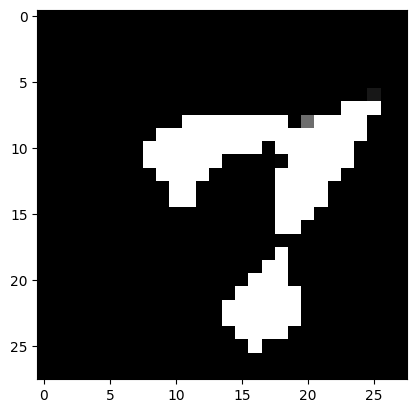

4/4 [==============================] - 2s 401ms/step
1420
diskriminator_loss: 9.788468480110168
diskriminator_accuracy: 0.32421875
dcgan_loss: 10.15361499786377


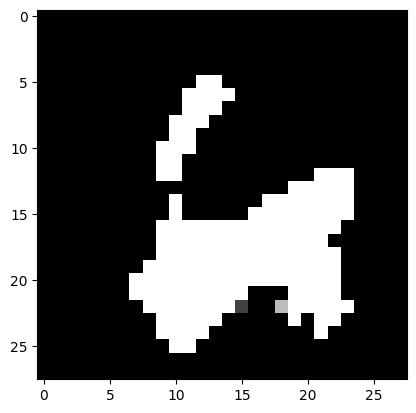

4/4 [==============================] - 2s 438ms/step
1430
diskriminator_loss: 9.601769924163818
diskriminator_accuracy: 0.41015625
dcgan_loss: 12.916128158569336


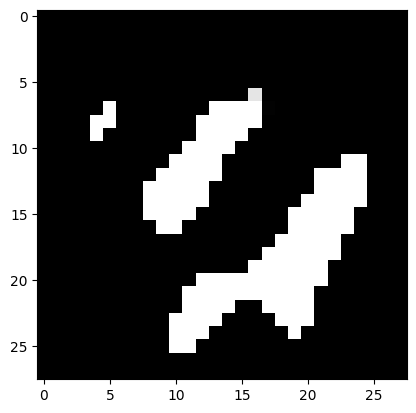

4/4 [==============================] - 1s 273ms/step
1440
diskriminator_loss: 10.521510660648346
diskriminator_accuracy: 0.40234375
dcgan_loss: 5.753427028656006


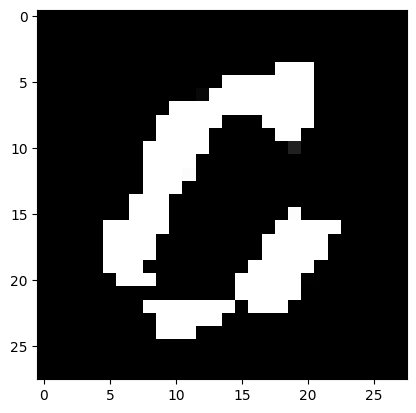

4/4 [==============================] - 1s 272ms/step
1450
diskriminator_loss: 5.5647019147872925
diskriminator_accuracy: 0.40234375
dcgan_loss: 6.03011417388916


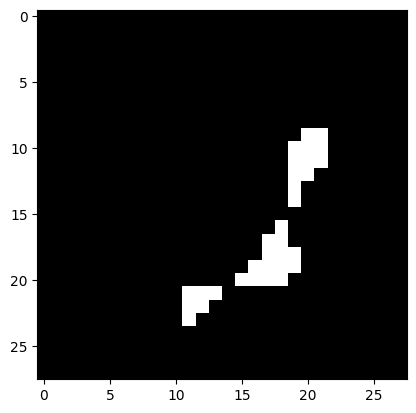

4/4 [==============================] - 1s 272ms/step
1460
diskriminator_loss: 3.6395668797194958
diskriminator_accuracy: 0.57421875
dcgan_loss: 8.576247215270996


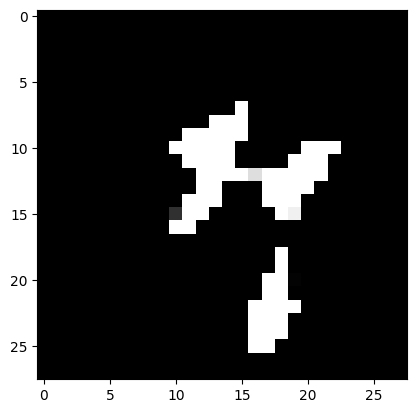

4/4 [==============================] - 2s 402ms/step
1470
diskriminator_loss: 5.322696566581726
diskriminator_accuracy: 0.5078125
dcgan_loss: 10.166879653930664


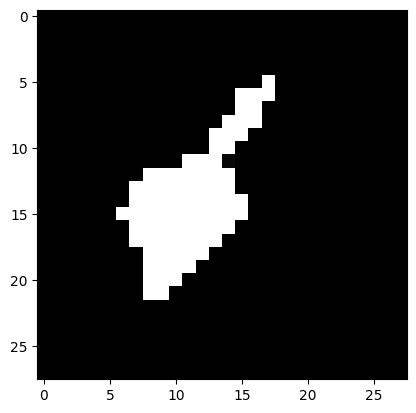

4/4 [==============================] - 1s 277ms/step
1480
diskriminator_loss: 9.925283253192902
diskriminator_accuracy: 0.3671875
dcgan_loss: 10.139017105102539


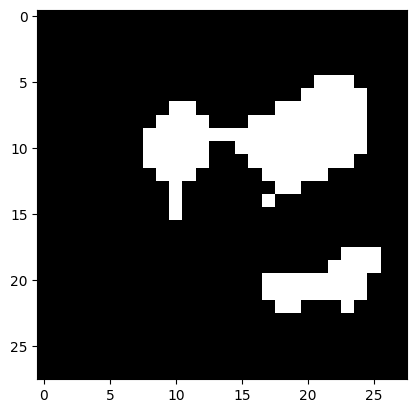

4/4 [==============================] - 1s 270ms/step
1490
diskriminator_loss: 10.80553114414215
diskriminator_accuracy: 0.4140625
dcgan_loss: 14.80274772644043


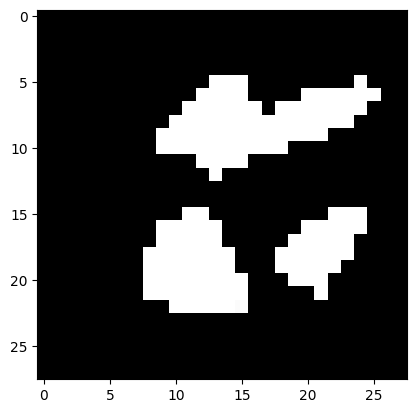

4/4 [==============================] - 1s 288ms/step
1500
diskriminator_loss: 12.124540090560913
diskriminator_accuracy: 0.4453125
dcgan_loss: 9.460411071777344


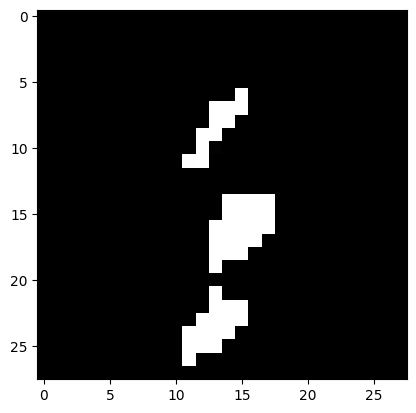

4/4 [==============================] - 2s 387ms/step
1510
diskriminator_loss: 7.099024742841721
diskriminator_accuracy: 0.421875
dcgan_loss: 6.433188438415527


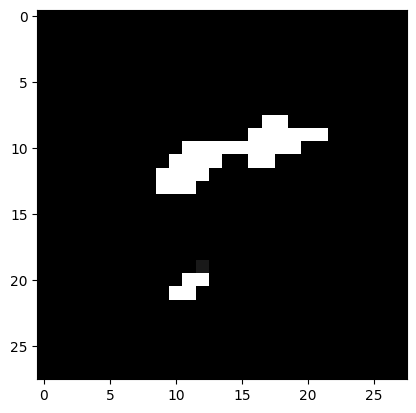

4/4 [==============================] - 2s 413ms/step
1520
diskriminator_loss: 4.722698986530304
diskriminator_accuracy: 0.56640625
dcgan_loss: 10.194770812988281


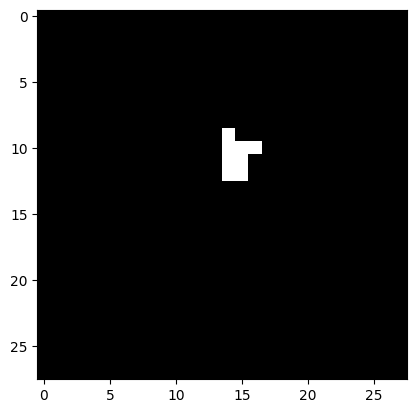

4/4 [==============================] - 1s 325ms/step
1530
diskriminator_loss: 7.7614346742630005
diskriminator_accuracy: 0.4609375
dcgan_loss: 12.3906888961792


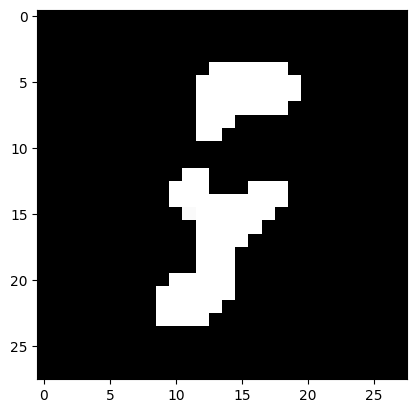

4/4 [==============================] - 2s 404ms/step
1540
diskriminator_loss: 11.200623750686646
diskriminator_accuracy: 0.296875
dcgan_loss: 13.520751953125


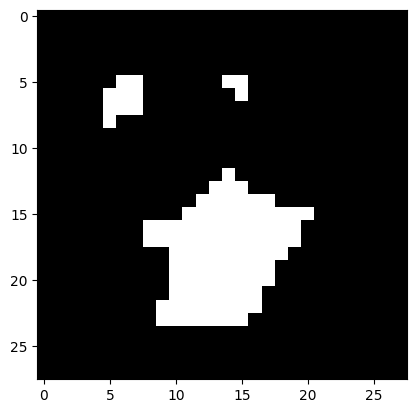

4/4 [==============================] - 1s 275ms/step
1550
diskriminator_loss: 11.43614661693573
diskriminator_accuracy: 0.359375
dcgan_loss: 20.7126407623291


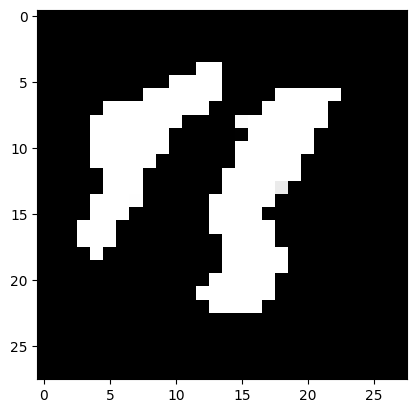

4/4 [==============================] - 1s 319ms/step
1560
diskriminator_loss: 12.997290760278702
diskriminator_accuracy: 0.4375
dcgan_loss: 11.990845680236816


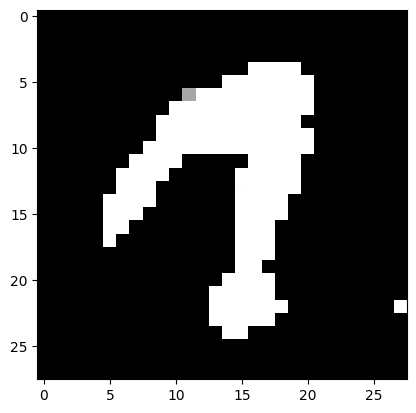

4/4 [==============================] - 1s 274ms/step
1570
diskriminator_loss: 9.47176331281662
diskriminator_accuracy: 0.3828125
dcgan_loss: 5.708529949188232


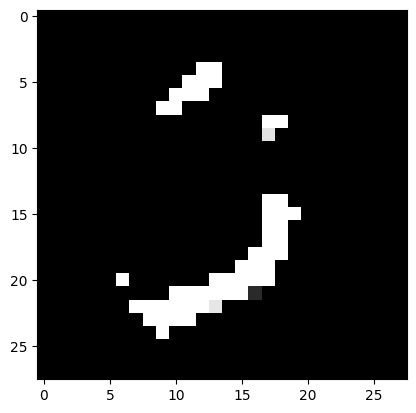

4/4 [==============================] - 1s 286ms/step
1580
diskriminator_loss: 3.6480468213558197
diskriminator_accuracy: 0.5703125
dcgan_loss: 11.373602867126465


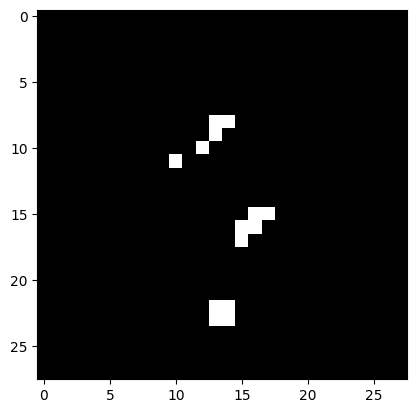

4/4 [==============================] - 1s 271ms/step
1590
diskriminator_loss: 4.8760614693164825
diskriminator_accuracy: 0.58984375
dcgan_loss: 12.883208274841309


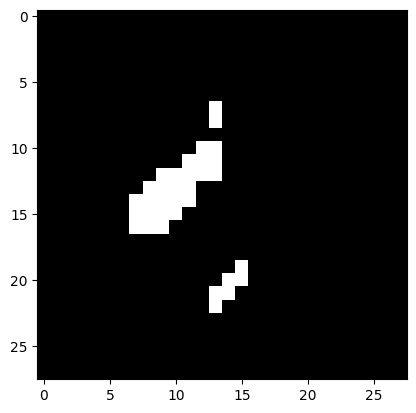

4/4 [==============================] - 1s 276ms/step
1600
diskriminator_loss: 9.932389497756958
diskriminator_accuracy: 0.37890625
dcgan_loss: 11.89361572265625


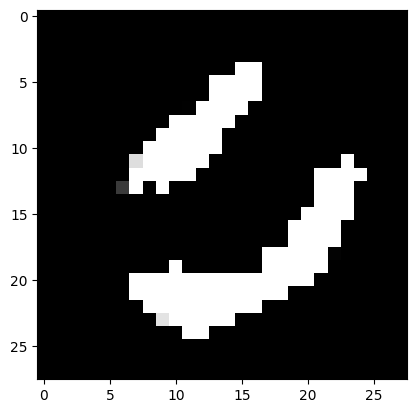

4/4 [==============================] - 1s 310ms/step
1610
diskriminator_loss: 13.286010026931763
diskriminator_accuracy: 0.3828125
dcgan_loss: 14.322412490844727


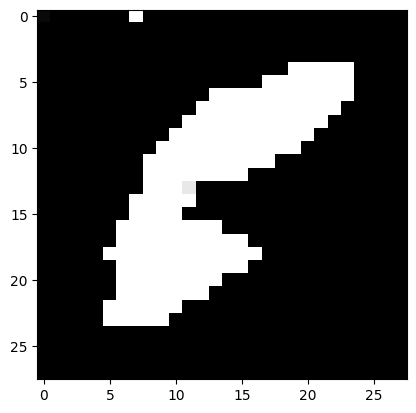

4/4 [==============================] - 1s 277ms/step
1620
diskriminator_loss: 13.568006336688995
diskriminator_accuracy: 0.38671875
dcgan_loss: 14.623970031738281


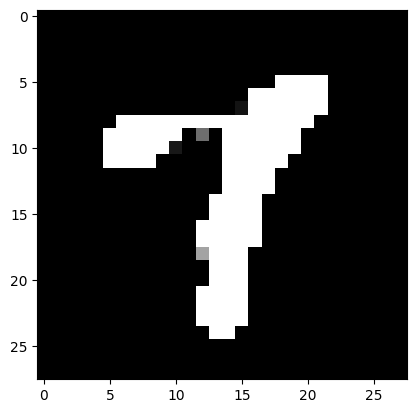

4/4 [==============================] - 1s 274ms/step
1630
diskriminator_loss: 11.747331976890564
diskriminator_accuracy: 0.41015625
dcgan_loss: 6.5163140296936035


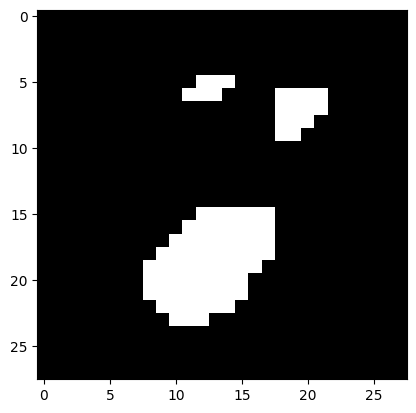

4/4 [==============================] - 2s 402ms/step
1640
diskriminator_loss: 6.467597842216492
diskriminator_accuracy: 0.44140625
dcgan_loss: 8.802412986755371


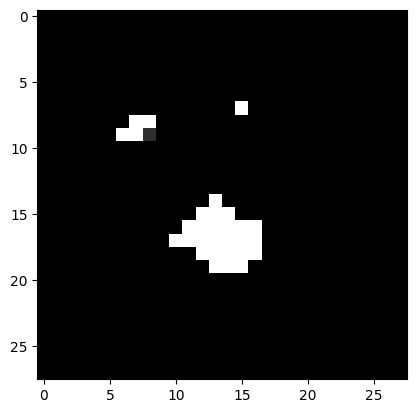

4/4 [==============================] - 1s 275ms/step
1650
diskriminator_loss: 6.679412245750427
diskriminator_accuracy: 0.48046875
dcgan_loss: 9.621492385864258


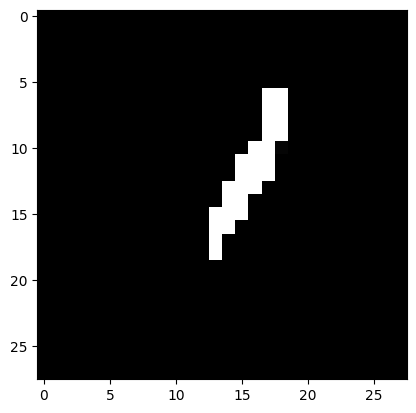

4/4 [==============================] - 1s 274ms/step
1660
diskriminator_loss: 7.559159100055695
diskriminator_accuracy: 0.3984375
dcgan_loss: 9.93281078338623


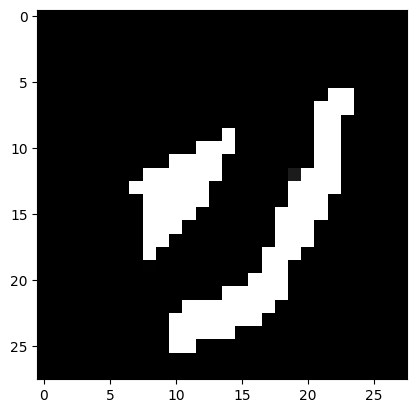

4/4 [==============================] - 1s 275ms/step
1670
diskriminator_loss: 10.21135151386261
diskriminator_accuracy: 0.375
dcgan_loss: 8.393816947937012


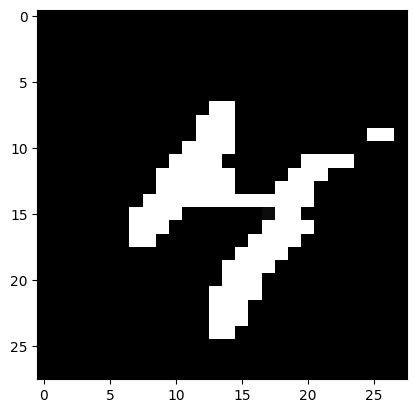

4/4 [==============================] - 2s 404ms/step
1680
diskriminator_loss: 11.748523592948914
diskriminator_accuracy: 0.3359375
dcgan_loss: 11.892728805541992


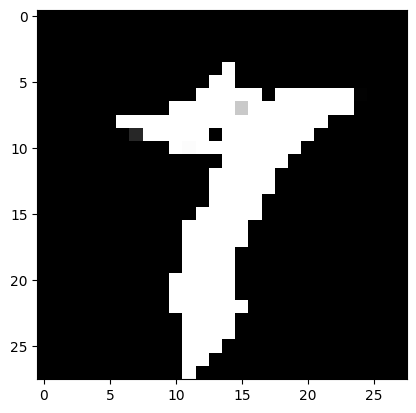

4/4 [==============================] - 1s 273ms/step
1690
diskriminator_loss: 12.651906669139862
diskriminator_accuracy: 0.3984375
dcgan_loss: 10.747876167297363


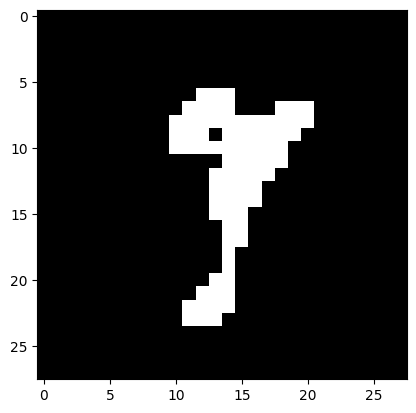

4/4 [==============================] - 1s 268ms/step
1700
diskriminator_loss: 10.67015540599823
diskriminator_accuracy: 0.3984375
dcgan_loss: 5.447100639343262


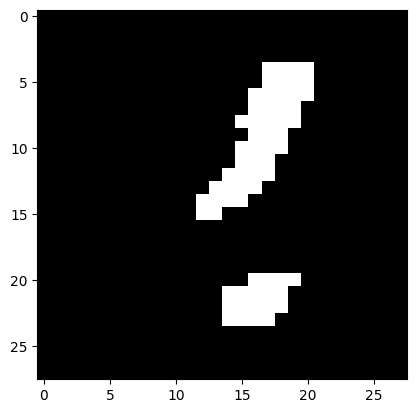

4/4 [==============================] - 1s 268ms/step
1710
diskriminator_loss: 5.251630067825317
diskriminator_accuracy: 0.47265625
dcgan_loss: 11.751269340515137


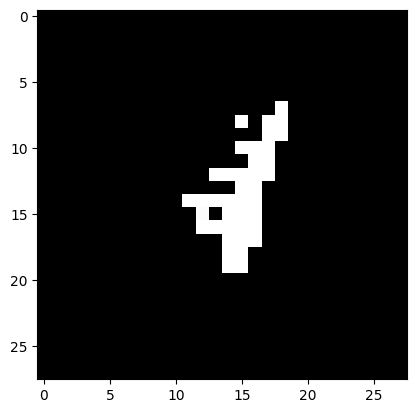

4/4 [==============================] - 1s 301ms/step
1720
diskriminator_loss: 7.420820891857147
diskriminator_accuracy: 0.48046875
dcgan_loss: 14.15407943725586


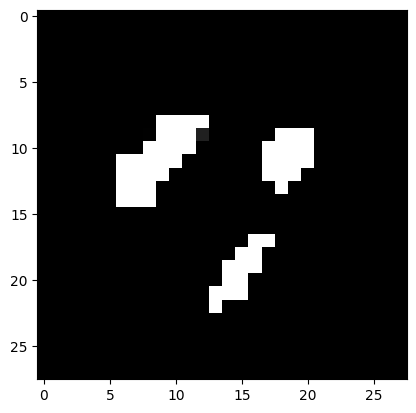

4/4 [==============================] - 2s 394ms/step
1730
diskriminator_loss: 10.464366495609283
diskriminator_accuracy: 0.3828125
dcgan_loss: 14.091009140014648


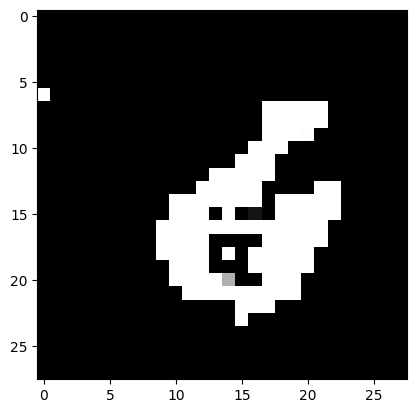

4/4 [==============================] - 1s 270ms/step
1740
diskriminator_loss: 15.412432551383972
diskriminator_accuracy: 0.38671875
dcgan_loss: 14.539383888244629


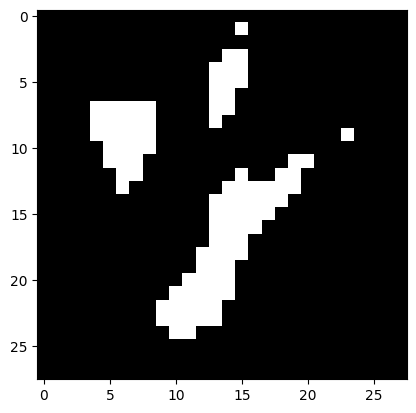

4/4 [==============================] - 1s 277ms/step
1750
diskriminator_loss: 14.685005903244019
diskriminator_accuracy: 0.4140625
dcgan_loss: 12.817975044250488


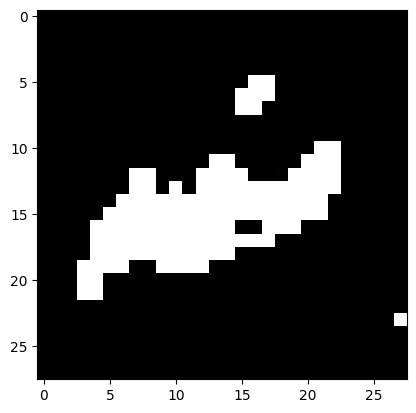

4/4 [==============================] - 1s 271ms/step
1760
diskriminator_loss: 10.465579330921173
diskriminator_accuracy: 0.41796875
dcgan_loss: 8.54466438293457


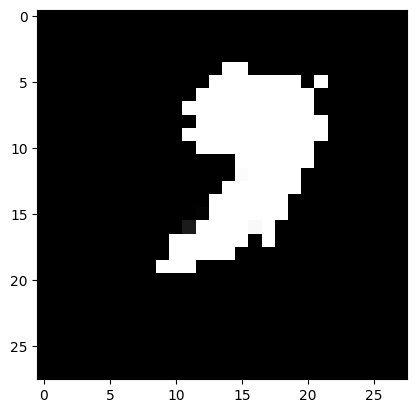

4/4 [==============================] - 1s 283ms/step
1770
diskriminator_loss: 8.07887750864029
diskriminator_accuracy: 0.39453125
dcgan_loss: 8.705924987792969


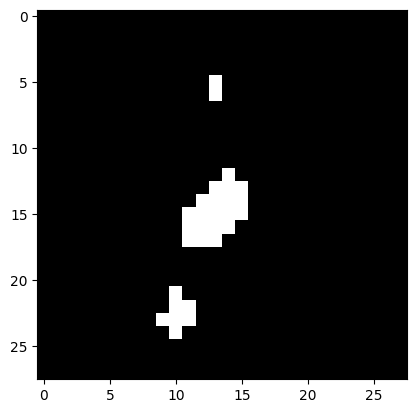

4/4 [==============================] - 1s 368ms/step
1780
diskriminator_loss: 8.546814739704132
diskriminator_accuracy: 0.3828125
dcgan_loss: 11.384847640991211


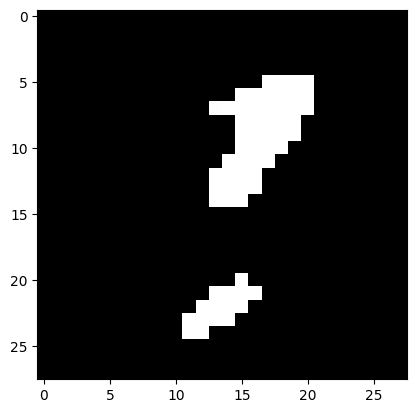

4/4 [==============================] - 1s 275ms/step
1790
diskriminator_loss: 11.183748722076416
diskriminator_accuracy: 0.38671875
dcgan_loss: 8.377860069274902


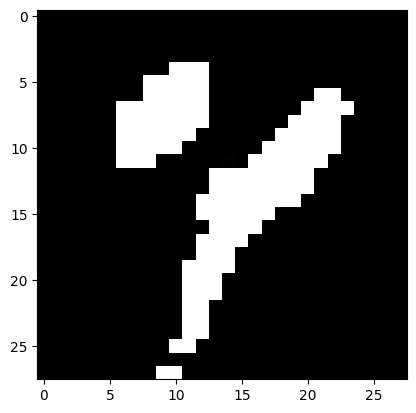

4/4 [==============================] - 1s 276ms/step
1800
diskriminator_loss: 11.275726437568665
diskriminator_accuracy: 0.3671875
dcgan_loss: 11.726131439208984


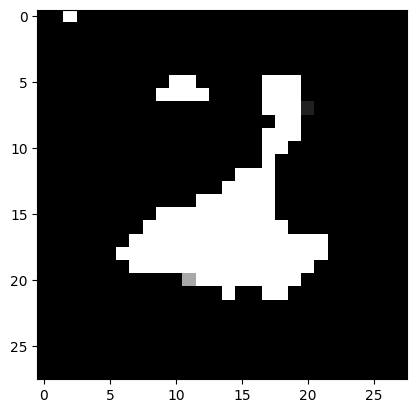

4/4 [==============================] - 1s 276ms/step
1810
diskriminator_loss: 12.349555611610413
diskriminator_accuracy: 0.3828125
dcgan_loss: 12.190888404846191


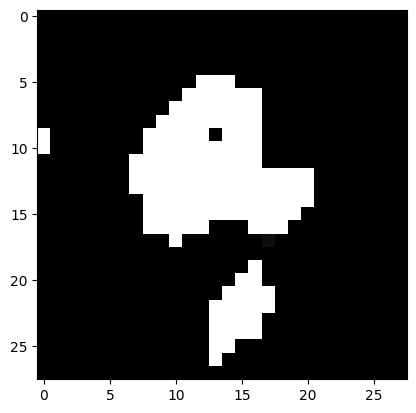

4/4 [==============================] - 2s 412ms/step
1820
diskriminator_loss: 12.126886785030365
diskriminator_accuracy: 0.3828125
dcgan_loss: 8.08409309387207


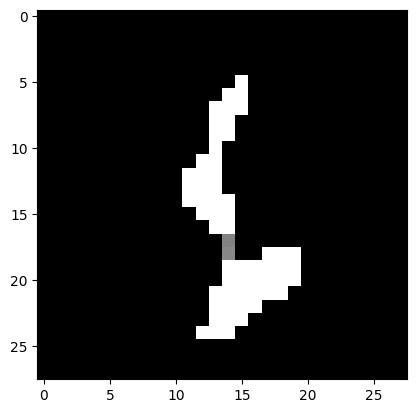

4/4 [==============================] - 1s 276ms/step
1830
diskriminator_loss: 9.281944870948792
diskriminator_accuracy: 0.40234375
dcgan_loss: 8.544084548950195


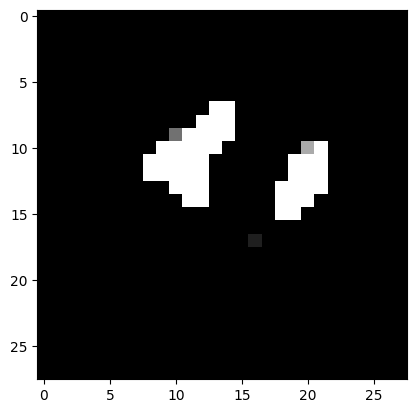

4/4 [==============================] - 1s 271ms/step
1840
diskriminator_loss: 8.366464495658875
diskriminator_accuracy: 0.42578125
dcgan_loss: 10.077653884887695


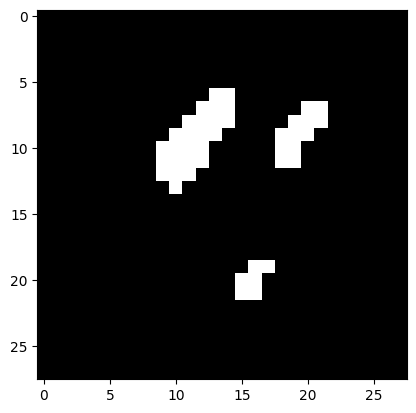

4/4 [==============================] - 1s 275ms/step
1850
diskriminator_loss: 8.316814094781876
diskriminator_accuracy: 0.45703125
dcgan_loss: 12.71689224243164


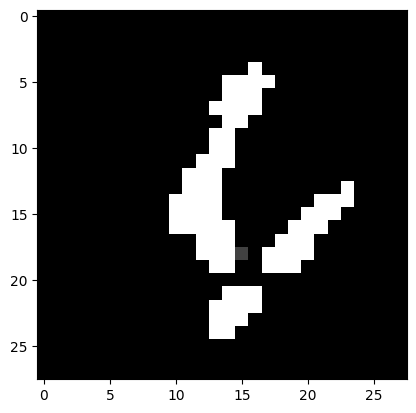

4/4 [==============================] - 1s 277ms/step
1860
diskriminator_loss: 11.112520575523376
diskriminator_accuracy: 0.359375
dcgan_loss: 13.903881072998047


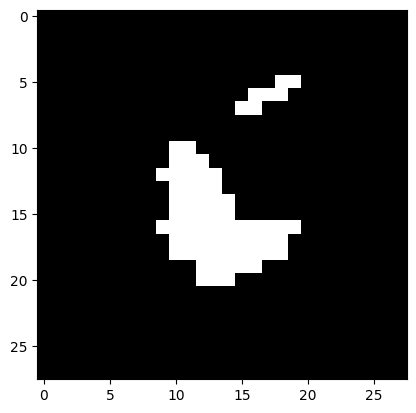

4/4 [==============================] - 1s 277ms/step
1870
diskriminator_loss: 12.602642297744751
diskriminator_accuracy: 0.375
dcgan_loss: 13.844268798828125


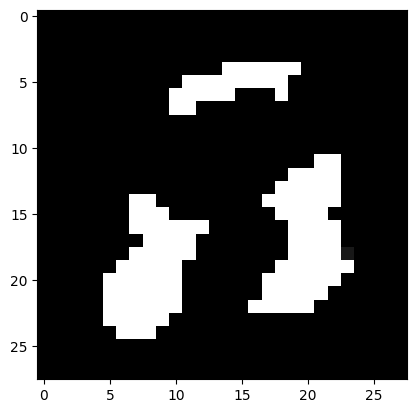

4/4 [==============================] - 1s 278ms/step
1880
diskriminator_loss: 11.676775336265564
diskriminator_accuracy: 0.4140625
dcgan_loss: 12.023847579956055


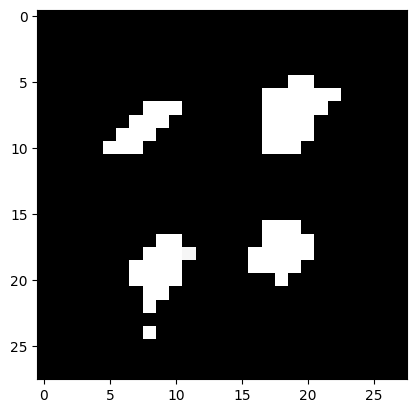

4/4 [==============================] - 1s 278ms/step
1890
diskriminator_loss: 9.425204068422318
diskriminator_accuracy: 0.45703125
dcgan_loss: 9.342937469482422


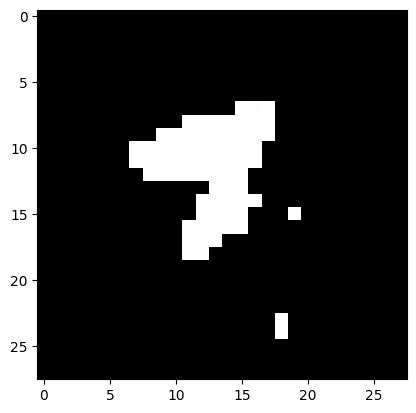

4/4 [==============================] - 1s 278ms/step
1900
diskriminator_loss: 8.654936820268631
diskriminator_accuracy: 0.4375
dcgan_loss: 8.911639213562012


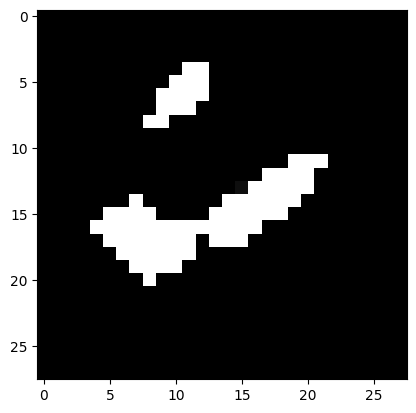

4/4 [==============================] - 1s 341ms/step
1910
diskriminator_loss: 9.809391379356384
diskriminator_accuracy: 0.3984375
dcgan_loss: 11.413222312927246


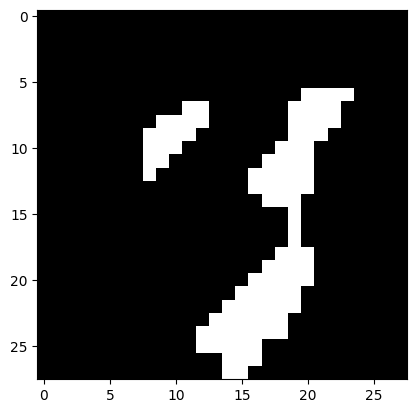

4/4 [==============================] - 2s 409ms/step
1920
diskriminator_loss: 11.663914442062378
diskriminator_accuracy: 0.421875
dcgan_loss: 10.868249893188477


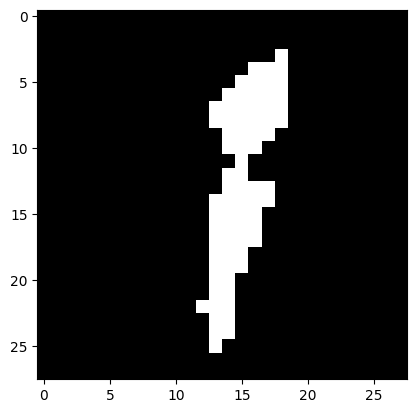

4/4 [==============================] - 1s 279ms/step
1930
diskriminator_loss: 12.031026601791382
diskriminator_accuracy: 0.4140625
dcgan_loss: 13.32888412475586


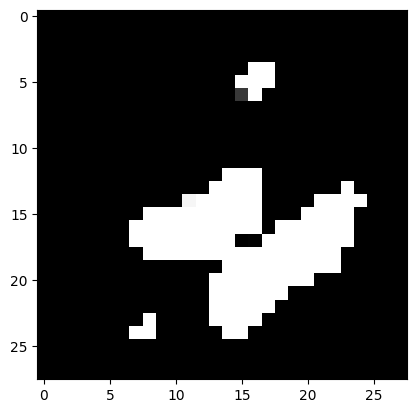

4/4 [==============================] - 1s 280ms/step
1940
diskriminator_loss: 13.404248654842377
diskriminator_accuracy: 0.44921875
dcgan_loss: 8.36336898803711


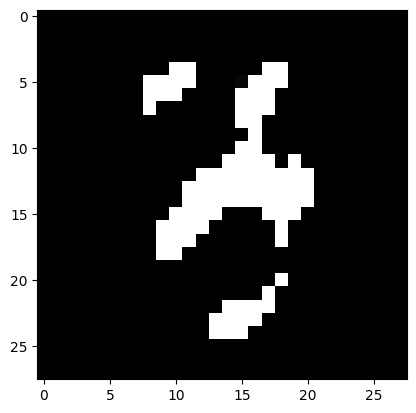

4/4 [==============================] - 1s 274ms/step
1950
diskriminator_loss: 10.86177134513855
diskriminator_accuracy: 0.3984375
dcgan_loss: 9.542438507080078


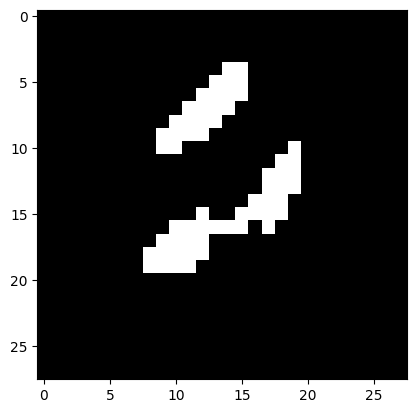

4/4 [==============================] - 1s 271ms/step
1960
diskriminator_loss: 9.633009314537048
diskriminator_accuracy: 0.39453125
dcgan_loss: 12.606056213378906


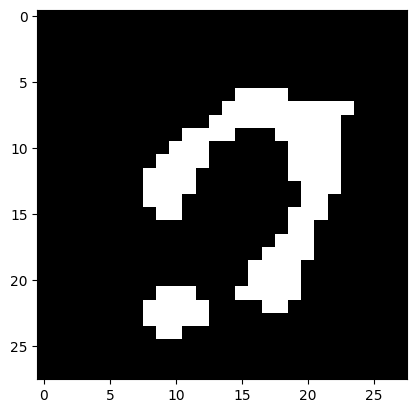

4/4 [==============================] - 2s 403ms/step
1970
diskriminator_loss: 9.760627150535583
diskriminator_accuracy: 0.38671875
dcgan_loss: 10.114797592163086


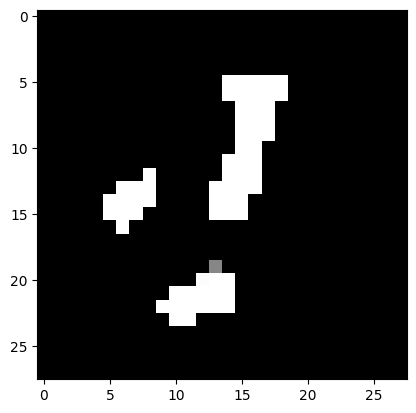

4/4 [==============================] - 1s 391ms/step
1980
diskriminator_loss: 10.970063626766205
diskriminator_accuracy: 0.4296875
dcgan_loss: 11.585468292236328


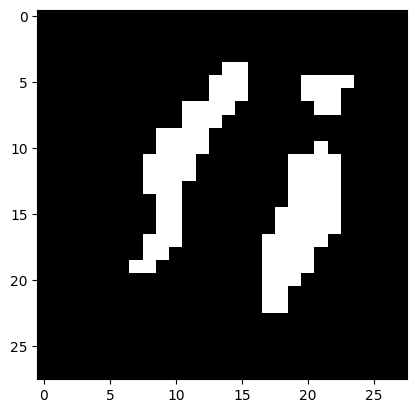

4/4 [==============================] - 1s 275ms/step
1990
diskriminator_loss: 12.875891923904419
diskriminator_accuracy: 0.39453125
dcgan_loss: 11.520332336425781


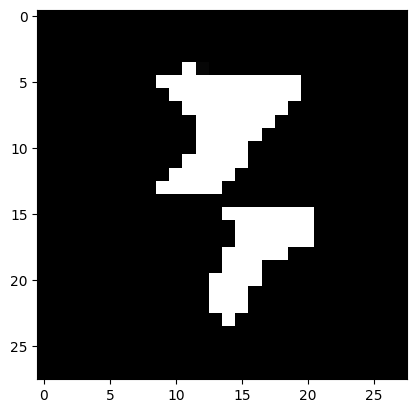

4/4 [==============================] - 2s 405ms/step


In [109]:
real_label = np.ones((batch_size, 1))
fake_label = np.zeros((batch_size, 1))

label_for_dcgan = np.ones((batch_size, 1))

dis_loss_fake = np.ones(shape=num_of_epochs)
dis_acc_fake = np.zeros(shape=num_of_epochs)

dis_loss_real = np.ones(shape=num_of_epochs)
dis_acc_real = np.zeros(shape=num_of_epochs)

dis_loss = np.ones(shape=num_of_epochs)
dis_acc = np.zeros(shape=num_of_epochs)

dcgan_loss = np.ones(shape=num_of_epochs)

generated_images = []


for epoch in range(num_of_epochs):
  noise = np.random.normal(0,1,size=(batch_size, latent_dim))
  fake_images = generator_model.predict(noise)
  generated_images.append(fake_images[0])
  real_images = X_train[np.random.randint(low=0, high=X_train.shape[0], size=batch_size)]

  dis_history_fake = discriminator_model.train_on_batch(fake_images, fake_label)
  dis_loss_fake[epoch] = dis_history_fake[0]
  dis_acc_fake[epoch] = dis_history_fake[1]

  dis_history_real = discriminator_model.train_on_batch(real_images, real_label)
  dis_loss_real[epoch] = dis_history_real[0]
  dis_acc_real[epoch] = dis_history_real[1]

  dis_loss[epoch] = 0.5 * (dis_loss_fake[epoch] + dis_loss_real[epoch])
  dis_acc[epoch] = 0.5 * (dis_acc_fake[epoch] + dis_acc_real[epoch])

  dcgan_history = dcgan_model.train_on_batch(noise, real_label)
  dcgan_loss[epoch] = dcgan_history


  if(epoch % 10 == 0):
    print(epoch)
    print("diskriminator_loss:", dis_loss[epoch])
    print("diskriminator_accuracy:", dis_acc[epoch])
    print("dcgan_loss:", dcgan_loss[epoch])
    fii=0
    plt.imshow(fake_images[fii], cmap="gray")
    fake_label[fii]
    plt.show()



1/1 [==============================] - 0s 142ms/step


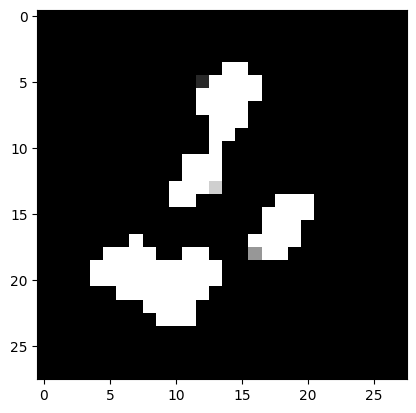

In [112]:
latent = np.random.normal(0,1,size=(1,latent_dim))
gen_img = generator_model.predict(latent)
gen_img = gen_img.reshape(28,28,1)
plt.imshow(gen_img, cmap="gray")

In [115]:
generator_model.save('models/generator_final.h5')
discriminator_model.save('models/discriminator_final.h5')
dcgan_model.save('models/gan_combined_final.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
